In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="darkgrid",font_scale=1.2)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)
%matplotlib inline

from scipy import stats
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict, learning_curve
from sklearn.preprocessing import LabelEncoder,PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

In [2]:
car = pd.read_csv("C:/Users/Hp/Downloads/cpp/cars_engage_2022 (1).csv")
car.head(5)

Unnamed: 0  Make      Model  Variant Ex-Showroom_Price Displacement  \
0           0  Tata  Nano Genx       Xt      Rs. 2,92,667       624 cc   
1           1  Tata  Nano Genx       Xe      Rs. 2,36,447       624 cc   
2           2  Tata  Nano Genx  Emax Xm      Rs. 2,96,661       624 cc   
3           3  Tata  Nano Genx      Xta      Rs. 3,34,768       624 cc   
4           4  Tata  Nano Genx       Xm      Rs. 2,72,223       624 cc   

   Cylinders  Valves_Per_Cylinder              Drivetrain  \
0        2.0                  2.0  RWD (Rear Wheel Drive)   
1        2.0                  2.0  RWD (Rear Wheel Drive)   
2        2.0                  2.0  RWD (Rear Wheel Drive)   
3        2.0                  2.0  RWD (Rear Wheel Drive)   
4        2.0                  2.0  RWD (Rear Wheel Drive)   

  Cylinder_Configuration Emission_Norm   Engine_Location Fuel_System  \
0                In-line         BS IV  Rear, Transverse   Injection   
1                In-line         BS IV  Rear, Transverse   Injection   
2                In-line         BS IV  Rear, Transverse   Injection   
3                In-line         BS IV  Rear, Transverse   Injection   
4                In-line         BS IV  Rear, Transverse   Injection   

  Fuel_Tank_Capacity Fuel_Type   Height   Length    Width  Body_Type  Doors  \
0          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
1          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
2          15 litres       CNG  1652 mm  3164 mm  1750 mm  Hatchback    4.0   
3          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   
4          24 litres    Petrol  1652 mm  3164 mm  1750 mm  Hatchback    5.0   

     City_Mileage Highway_Mileage ARAI_Certified_Mileage  \
0  ?23.6 km/litre             NaN          23.6 km/litre   
1  ?23.6 km/litre             NaN          23.6 km/litre   
2             NaN             NaN                    NaN   
3  ?23.6 km/litre             NaN          21.9 km/litre   
4  ?23.6 km/litre             NaN          23.6 km/litre   

  ARAI_Certified_Mileage_for_CNG Kerb_Weight Gears Ground_Clearance  \
0                            NaN      660 kg     4           180 mm   
1                            NaN      725 kg     4           180 mm   
2                       36 km/kg      710 kg     4           180 mm   
3                            NaN      725 kg     5           180 mm   
4                            NaN      725 kg     4           180 mm   

  Front_Brakes Rear_Brakes                                   Front_Suspension  \
0         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...   
1         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...   
2         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...   
3         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...   
4         Drum        Drum  Independent, Lower Wishbone, McPherson Strut w...   

                                     Rear_Suspension Front_Track Rear_Track  \
0  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   
1  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   
2  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   
3  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   
4  Independent, Semi Trailing arm with coil sprin...     1325 mm    1315 mm   

  Front_Tyre_&_Rim Rear_Tyre_&_Rim  Power_Steering       Power_Windows  \
0        135/70R12       155/65R12  Electric Power  Only Front Windows   
1        135/70R12       155/65R12             NaN                 NaN   
2        135/70R12       155/65R12  Electric Power                 NaN   
3        135/70R12       155/65R12  Electric Power  Only Front Windows   
4        135/70R12       155/65R12  Electric Power                 NaN   

  Power_Seats Keyless_Entry         Power        Torque Odometer Speedometer  \
0       

In [3]:
car.shape

(1276, 141)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 141 entries, Unnamed: 0 to Electric_Range
dtypes: float64(6), int64(1), object(134)
memory usage: 1.4+ MB


In [5]:
car.select_dtypes(include="float").sample(5)

Cylinders  Valves_Per_Cylinder  Doors  Seating_Capacity  \
277        4.0                  4.0    4.0               4.0   
900        4.0                  4.0    5.0               5.0   
709        4.0                  4.0    5.0               7.0   
931        4.0                  4.0    5.0               7.0   
300        6.0                  NaN    5.0               5.0   

     Number_of_Airbags  USB_Ports  
277                6.0        NaN  
900                2.0        NaN  
709                3.0        NaN  
931                2.0        NaN  
300                6.0        NaN

In [6]:
car.select_dtypes(include="object").sample(5)

Make         Model                 Variant Ex-Showroom_Price  \
330           Audi          A8 L         55 Tfsi Quattro   Rs. 1,56,00,000   
130        Hyundai     Elite I20   Sportz Plus Dual Tone      Rs. 7,51,693   
231          Honda          Jazz                S Diesel      Rs. 8,16,500   
44   Maruti Suzuki  Celerio Tour                      H2      Rs. 4,22,444   
979            Kia        Seltos  Htx Plus At 1.5 Diesel     Rs. 16,34,000   

    Displacement               Drivetrain Cylinder_Configuration  \
330      2995 cc    AWD (All Wheel Drive)                      V   
130      1197 cc  FWD (Front Wheel Drive)                In-line   
231      1498 cc  FWD (Front Wheel Drive)                In-line   
44        998 cc  FWD (Front Wheel Drive)                In-line   
979      1493 cc  FWD (Front Wheel Drive)                In-line   

    Emission_Norm      Engine_Location Fuel_System Fuel_Tank_Capacity  \
330          BS 6  Front, Longitudinal   Injection          82 litres   
130         BS IV    Front, Transverse   Injection          45 litres   
231         BS IV    Front, Transverse   Injection          40 litres   
44          BS IV    Front, Transverse   Injection          35 litres   
979          BS 6  Front, Longitudinal   Injection          60 litres   

    Fuel_Type   Height   Length    Width  Body_Type   City_Mileage  \
330    Petrol  1485 mm  5302 mm  1945 mm      Sedan            NaN   
130    Petrol  1505 mm  3985 mm  1734 mm  Hatchback  13.3 km/litre   
231    Diesel  1544 mm  3955 mm  1694 mm  Hatchback    12 km/litre   
44     Petrol  1560 mm  3600 mm  1600 mm  Hatchback    23 km/litre   
979    Diesel  1645 mm  4315 mm  1800 mm        SUV            NaN   

    Highway_Mileage ARAI_Certified_Mileage ARAI_Certified_Mileage_for_CNG  \
330             NaN                    NaN                            NaN   
130   18.5 km/litre          18.6 km/litre                            NaN   
231             NaN          27.3 km/litre                            NaN   
44              NaN          23.1 km/litre                            NaN   
979             NaN            20 km/litre                            NaN   

    Kerb_Weight Gears Ground_Clearance     Front_Brakes      Rear_Brakes  \
330     2030 kg     8              NaN  Ventilated Disc  Ventilated Disc   
130     1060 kg     5           170 mm  Ventilated Disc             Drum   
231     1139 kg     6           165 mm  Ventilated Disc             Drum   
44       830 kg     5           165 mm  Ventilated Disc             Drum   
979         NaN     6           190 mm  Ventilated Disc  Ventilated Disc   

                                      Front_Suspension  \
330  Five-link front axle; tubular anti-roll bar ai...   
130                   McPherson strut with coil spring   
231                                    McPherson Strut   
44                   Macpherson strut with Coil Spring   
979                   McPherson strut with coil spring   

                                       Rear_Suspension Front_Track Rear_Track  \
330  Five-link rear axle tubular anti-roll bar; air...     1644 mm    1633 mm   
130         Coupled Torsion Beam Axle with coil spring     1505 mm    1503 mm   
231                                  Torsion Beam Axle     1490 mm    1475 mm   
44          Coupled Torsion Beam Axle with coil spring     1420 mm    1410 mm   
979  Coupled Torsion Beam Axle (CTBA) with coil spring         NaN        NaN   

    Front_Tyre_&_Rim Rear_Tyre_&_Rim     Power_Steering Power_Windows  \
330       255/45 R19      255/45 R19  Electro-Hydraulic   All Windows   
130        185/70R14       185/70R14     Electric Power   All Windows   
231           175/65          175/65     Electric Power   All Windows   
44         155/80R13       155/80R13     Electric Power           NaN   
979       205/65 R16      205/65 R16     Electric Power   All Windows   

          Power_Seats Keyless_Entry          Power              Torque  \
330  Ye

In [7]:
null_car = car.isnull().sum()[car.isnull().sum()>0].to_frame().rename(columns={0:"Total No. of Missing Values"})
null_car["% of Missing values"] = round(100*null_car["Total No. of Missing Values"]/len(car),2)
null_car.sort_values(by="% of Missing values",ascending=False)

Total No. of Missing Values  \
Other_Specs                                                       1266   
Recommended_Tyre_Pressure                                         1266   
Battery                                                           1263   
Electric_Range                                                    1259   
ARAI_Certified_Mileage_for_CNG                                    1249   
USB_Ports                                                         1247   
Engine_Type                                                       1242   
3_Point_Seat-Belt_in_Middle_Rear_Seat                             1225   
Heads-Up_Display                                                  1225   
Ambient_Lightning                                                 1220   
Other_specs                                                       1213   
Lane_Watch_Camera/_Side_Mirror_Camera                             1210   
Welcome_Lights                                                    1207   
Walk_Away_Auto_Car_Lock                                           1173   
Cargo/Boot_Lights                                                 1155   
Voice_Recognition                                                 1144   
Passenger_Side_Seat-Belt_Reminder                                 1105   
Android_Auto                                                      1103   
Apple_CarPlay                                                     1103   
Drive_Modes                                                       1081   
High_Speed_Alert_System                                           1068   
Heated_Seats                                                      1010   
Paddle_Shifters                                                    972   
Tyre_Pressure_Monitoring_System                                    936   
Compression_Ratio                                                  917   
Power_Seats                                                        893   
ASR_/_Traction_Control                                             834   
Highway_Mileage                                                    800   
Rain_Sensing_Wipers                                                798   
Hill_Assist                                                        796   
ESP_(Electronic_Stability_Program)                                 779   
Automatic_Headlamps                                                774   
Cruise_Control                                                     727   
EBA_(Electronic_Brake_Assist)                                      690   
Leather_Wrapped_Steering                                           689   
Cigarette_Lighter                                                  682   
Start_/_Stop_Button                                                678   
Rear_Track                                                         676   
Front_Track                                                        667   
ISOFIX_(Child-Seat_Mount)                                          666   
iPod_Compatibility                                                 663   
Extended_Warranty                                                  661   
Cooled_Glove_Box                                                   645   
Auto-Dimming_Rear-View_Mirror                                      620   
Turbocharger                                                       618   
Second_Row_AC_Vents                                                602   
Gross_Vehicle_Weight                                               595   
Navigation_System                                                  593   
Rear_Center_Armrest                                                559   
City_Mileage                                                       555   
Gear_Shift_Reminder                                                543   
Average_Speed                                                      512   
Gear_Indicator                                                     499   
Infotainment_Screen                            

In [8]:
high_null_car = null_car[null_car["% of Missing values"]>70].index.tolist()
car.drop(columns=high_null_car,inplace=True)
car.shape

(1276, 116)

In [9]:
car.dtypes.to_frame().rename(columns={0:"Data-Types"})

Data-Types
Unnamed: 0                                     int64
Make                                          object
Model                                         object
Variant                                       object
Ex-Showroom_Price                             object
Displacement                                  object
Cylinders                                    float64
Valves_Per_Cylinder                          float64
Drivetrain                                    object
Cylinder_Configuration                        object
Emission_Norm                                 object
Engine_Location                               object
Fuel_System                                   object
Fuel_Tank_Capacity                            object
Fuel_Type                                     object
Height                                        object
Length                                        object
Width                                         object
Body_Type                                     object
Doors                                        float64
City_Mileage                                  object
Highway_Mileage                               object
ARAI_Certified_Mileage                        object
Kerb_Weight                                   object
Gears                                         object
Ground_Clearance                              object
Front_Brakes                                  object
Rear_Brakes                                   object
Front_Suspension                              object
Rear_Suspension                               object
Front_Track                                   object
Rear_Track                                    object
Front_Tyre_&_Rim                              object
Rear_Tyre_&_Rim                               object
Power_Steering                                object
Power_Windows                                 object
Power_Seats                                   object
Keyless_Entry                                 object
Power                                         object
Torque                                        object
Odometer                                      object
Speedometer                                   object
Tachometer                                    object
Tripmeter                                     object
Seating_Capacity                             float64
Seats_Material                                object
Type                                          object
Wheelbase                                     object
Wheels_Size                                   object
Start_/_Stop_Button                           object
12v_Power_Outlet                              object
Audiosystem                                   object
Aux-in_Compatibility                          object
Average_Fuel_Consumption                      object
Basic_Warranty                                object
Bluetooth                                     object
Boot-lid_Opener                               object
Boot_Space                                    object
CD_/_MP3_/_DVD_Player                         object
Central_Locking                               object
Child_Safety_Locks                            object
Clock                                         object
Cup_Holders                                   object
Distance_to_Empty                             object
Door_Pockets                                  object
Engine_Malfunction_Light                      object
Extended_Warranty                             object
FM_Radio                                      object
Fuel-lid_Opener                               object
Fuel_Gauge                                    object
Handbrake                                     object
Instrument_Console                            object
Low_Fuel_Warning                              object
Minimum_Turning_Radius                        object
Multifunction_Display                         object
Sun_Visor     

In [10]:
car_numeric = car.select_dtypes(include="float")    ##Containing only Numerical Attributes.
car_object  = car.select_dtypes(include="object")   ##Containing only Categorical Attributes.
print("Shape of numerical dataframe is:",car_numeric.shape)
print("Shape of categorical dataframe is:", car_object.shape)

Shape of numerical dataframe is: (1276, 5)
Shape of categorical dataframe is: (1276, 110)


In [11]:
car_numeric.sample(5)

Cylinders  Valves_Per_Cylinder  Doors  Seating_Capacity  \
745        NaN                  NaN    5.0               5.0   
848        8.0                  4.0    5.0               7.0   
951        3.0                  4.0    5.0               7.0   
804        6.0                  4.0    5.0               5.0   
445        4.0                  4.0    5.0               9.0   

     Number_of_Airbags  
745                6.0  
848               10.0  
951                2.0  
804                6.0  
445                NaN

In [12]:
null_car = car_numeric.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values"})
null_car["% of Missing Values"] = round((100*null_car["Total No. of Missing Values"])/len(car_numeric),2)
null_car

Total No. of Missing Values  % of Missing Values
Cylinders                                     66                 5.17
Valves_Per_Cylinder                          102                 7.99
Doors                                          4                 0.31
Seating_Capacity                               6                 0.47
Number_of_Airbags                            135                10.58

In [13]:
imputer = SimpleImputer(strategy="median")
cols = car_numeric.columns.to_list()      ##List of all numerical columns.
car_numeric[cols] = imputer.fit_transform(car[cols])

In [14]:
car_numeric.isnull().sum().to_frame().rename(columns={0:"Total No. of Missing Values Left"})

Total No. of Missing Values Left
Cylinders                                           0
Valves_Per_Cylinder                                 0
Doors                                               0
Seating_Capacity                                    0
Number_of_Airbags                                   0

In [15]:
car_object.sample(5)

Make         Model       Variant Ex-Showroom_Price  \
1271          Honda          City  Vx Mt Diesel     Rs. 13,02,000   
285            Audi  A3 Cabriolet       40 Tfsi     Rs. 50,38,000   
826           Volvo          Xc90   D5 R-Design     Rs. 84,91,500   
29    Maruti Suzuki      Alto K10           Lxi      Rs. 3,77,588   
465            Tata          Zest    Xma Diesel      Rs. 8,36,320   

     Displacement               Drivetrain Cylinder_Configuration  \
1271      1498 cc  FWD (Front Wheel Drive)                In-line   
285       1395 cc  FWD (Front Wheel Drive)                In-line   
826       1969 cc    AWD (All Wheel Drive)                In-line   
29         998 cc  FWD (Front Wheel Drive)                In-line   
465       1248 cc  FWD (Front Wheel Drive)                In-line   

     Emission_Norm      Engine_Location Fuel_System Fuel_Tank_Capacity  \
1271         BS IV    Front, Transverse   Injection          40 litres   
285          BS IV  Front, Longitudinal   Injection          50 litres   
826          BS IV  Front, Longitudinal   Injection          68 litres   
29           BS IV    Front, Transverse   Injection          35 litres   
465          BS IV    Front, Transverse   Injection          44 litres   

     Fuel_Type   Height   Length    Width    Body_Type   City_Mileage  \
1271    Diesel  1495 mm  4440 mm  1695 mm        Sedan  22.6 km/litre   
285     Petrol  1409 mm  4421 mm  1793 mm  Convertible  19.2 km/litre   
826     Diesel  1776 mm  4950 mm  2140 mm          SUV  13.2 km/litre   
29      Petrol  1475 mm  3545 mm  1490 mm    Hatchback    14 km/litre   
465     Diesel  1570 mm  3995 mm  1706 mm        Sedan  19.2 km/litre   

     Highway_Mileage ARAI_Certified_Mileage Kerb_Weight Gears  \
1271   25.1 km/litre          25.1 km/litre     1170 kg     6   
285              NaN          19.2 km/litre     1430 kg     7   
826              NaN          17.2 km/litre     2962 kg     8   
29       17 km/litre         24.07 km/litre      745 kg     5   
465              NaN            23 km/litre     1170 kg     5   

     Ground_Clearance     Front_Brakes      Rear_Brakes  \
1271           165 mm  Ventilated Disc             Drum   
285            160 mm  Ventilated Disc  Ventilated Disc   
826            218 mm  Ventilated Disc  Ventilated Disc   
29             160 mm  Ventilated Disc             Drum   
465            165 mm  Ventilated Disc             Drum   

                                       Front_Suspension  \
1271                       McPherson Strut, Coil Spring   
285                                     McPherson Strut   
826   4-link air suspension, anti-dive, automatic le...   
29                          Gas Filled Mc Pherson Strut   
465   Dual Path Independent McPherson strut with Coi...   

                                     Rear_Suspension Front_Track Rear_Track  \
1271                  Torsion Beam Axle, Coil Spring     1475 mm    1465 mm   
285                                     Multi - link     1555 mm    1526 mm   
826                5Link Suspension with coil spring     1668 mm    1671 mm   
29                      3-link rigid axle Suspension     1295 mm    1290 mm   
465   Twist Beam with Coil spring and Shock Absorber     1450 mm    1440 mm   

     Front_Tyre_&_Rim Rear_Tyre_&_Rim     Power_Steering Power_Windows  \
1271        185/55R16       185/55R16     Electric Power   All Windows   
285      205 / 55 R16    205 / 55 R16     Electric Power   All Windows   
826         235/65R20       235/65R20  Electro-Hydraulic   All Windows   
29          155/65R13       155/65R13                Yes           NaN   
465         185/60R15       185/60R15     Electric Power   All Windows   

      Power_Seats Keyless_Entry               Power              Torque  \
1271          NaN     Smart Key       100PS@3600rpm       200Nm@1750rpm   
285           NaN     Smart Key  148 bhp @ 5100 rpm   250 Nm @ 1250 RPM   
826   Power seats     Smart Key  235 bhp @ 4250 rpm   4

In [16]:
relevant_cols = ['Make', 'Model', 'Variant', 'Ex-Showroom_Price', 'Displacement', 'Drivetrain',"Cylinder_Configuration",
                 'Emission_Norm', "Engine_Location", "Fuel_Tank_Capacity","Height", "Length", "Width",
                 "Body_Type", "ARAI_Certified_Mileage", "Kerb_Weight", "Ground_Clearance", "Boot_Space", "Power_Steering",
                 "Keyless_Entry", "Power", "Torque", "Odometer", "Speedometer", "Tachometer", "Tripmeter", "Seats_Material"
                 ,"Fuel_Type", "Wheelbase", "Central_Locking", "Child_Safety_Locks", "Low_Fuel_Warning",
                 "Third_Row_AC_Vents", "Second_Row_AC_Vents", "Auto-Dimming_Rear-View_Mirror", "Engine_Immobilizer",
                 "ABS_(Anti-lock_Braking_System)", "EBD_(Electronic_Brake-force_Distribution)", "Cooled_Glove_Box",
                 "EBA_(Electronic_Brake_Assist)", "ESP_(Electronic_Stability_Program)",
                 "Gear_Shift_Reminder", "Adjustable_Steering_Column", "Parking_Assistance","Key_Off_Reminder",
                 "USB_Compatibility", "Bluetooth", "Seat_Height_Adjustment", "Navigation_System", "Turbocharger",
                 "Automatic_Headlamps","Cruise_Control"]

In [17]:
car_object_2 = car_object[relevant_cols]
car_object_2.shape

(1276, 52)

In [18]:
car_object_2.sample(2)

Make       Model           Variant Ex-Showroom_Price  \
549        Hyundai  I20 Active  1.2 Sx Dual Tone      Rs. 8,82,298   
382  Maruti Suzuki     Celerio        Vxi Cng Mt      Rs. 5,30,000   

    Displacement               Drivetrain Cylinder_Configuration  \
549      1197 cc  FWD (Front Wheel Drive)                In-line   
382       998 cc  FWD (Front Wheel Drive)                In-line   

    Emission_Norm    Engine_Location Fuel_Tank_Capacity   Height   Length  \
549         BS IV  Front, Transverse          40 litres  1555 mm  3995 mm   
382          BS 6  Front, Transverse          35 litres  1560 mm  3600 mm   

       Width  Body_Type ARAI_Certified_Mileage Kerb_Weight Ground_Clearance  \
549  1760 mm  Hatchback         17.19 km/litre         NaN           190 mm   
382  1600 mm  Hatchback                    NaN      810 kg           165 mm   

     Boot_Space  Power_Steering Keyless_Entry         Power         Torque  \
549  285 litres  Electric Power     Smart Key  83PS@6000rpm  114Nm@4000rpm   
382  235 litres  Electric Power           NaN  59PS@6000rpm   78Nm@3500rpm   

    Odometer Speedometer    Tachometer Tripmeter Seats_Material Fuel_Type  \
549  Digital      Analog        Analog       Yes        Leather    Petrol   
382  Digital      Analog  Not on offer       Yes         Fabric       CNG   

    Wheelbase Central_Locking Child_Safety_Locks Low_Fuel_Warning  \
549   2570 mm             Yes                Yes              Yes   
382   2425 mm             Yes                Yes              Yes   

    Third_Row_AC_Vents Second_Row_AC_Vents Auto-Dimming_Rear-View_Mirror  \
549     Not Applicable                 Yes                           Yes   
382     Not Applicable                 NaN                           Yes   

    Engine_Immobilizer ABS_(Anti-lock_Braking_System)  \
549                Yes                            Yes   
382                Yes                            NaN   

    EBD_(Electronic_Brake-force_Distribution) Cooled_Glove_Box  \
549                                       NaN              Yes   
382                                       NaN              NaN   

    EBA_(Electronic_Brake_Assist) ESP_(Electronic_Stability_Program)  \
549                           NaN                                NaN   
382                           NaN                                NaN   

    Gear_Shift_Reminder Adjustable_Steering_Column        Parking_Assistance  \
549                 Yes                Rake, Reach  Rear sensors with camera   
382                 NaN                        NaN                       NaN   

    Key_Off_Reminder USB_Compatibility Bluetooth Seat_Height_Adjustment  \
549              NaN               Yes       Yes      Manual Adjustment   
382              Yes               NaN       NaN                    NaN   

    Navigation_System Turbocharger Automatic_Headlamps Cruise_Control  
549               Yes          NaN                 Yes            NaN  
382               NaN          NaN                 NaN            NaN

In [19]:
null_car = car_object_2.isnull().sum()[car_object_2.isnull().sum()>0].to_frame().rename(columns={0:"Total No. of Missing Values"})
null_car["% of Missing Values"] = round((100*null_car["Total No. of Missing Values"])/len(car_object_2),2)
null_car.sort_values(by="% of Missing Values",ascending=False)

Total No. of Missing Values  \
ESP_(Electronic_Stability_Program)                                 779   
Automatic_Headlamps                                                774   
Cruise_Control                                                     727   
EBA_(Electronic_Brake_Assist)                                      690   
Cooled_Glove_Box                                                   645   
Auto-Dimming_Rear-View_Mirror                                      620   
Turbocharger                                                       618   
Second_Row_AC_Vents                                                602   
Navigation_System                                                  593   
Gear_Shift_Reminder                                                543   
Third_Row_AC_Vents                                                 366   
Kerb_Weight                                                        365   
Key_Off_Reminder                                                   340   
Seat_Height_Adjustment                                             326   
Bluetooth                                                          292   
Parking_Assistance                                                 290   
Ground_Clearance                                                   289   
Keyless_Entry                                                      274   
USB_Compatibility                                                  267   
Boot_Space                                                         249   
EBD_(Electronic_Brake-force_Distribution)                          201   
Adjustable_Steering_Column                                         191   
Central_Locking                                                    149   
ABS_(Anti-lock_Braking_System)                                     132   
ARAI_Certified_Mileage                                             114   
Make                                                                75   
Child_Safety_Locks                                                  75   
Fuel_Tank_Capacity                                                  69   
Tripmeter                                                           60   
Engine_Immobilizer                                                  60   
Power_Steering                                                      57   
Speedometer                                                         45   
Odometer                                                            43   
Engine_Location                                                     43   
Low_Fuel_Warning                                                    36   
Wheelbase                                                           20   
Cylinder_Configuration                                              13   
Tachometer                                                          13   
Displacement                                                        12   
Width                                                               12   
Seats_Material                                                      12   
Emission_Norm                                                       11   
Drivetrain                                                           7   
Body_Type                                                            6   
Torque                                                               2   
Height                                                               1   

                                           % of Missing Values  
ESP_(Electronic_Stability_Program)                       61.05  
Automatic_Headlamps                                      60.66  
Cruise_Control                                           56.97  
EBA_(Electronic_Brake_Assist)                            54.08  
Cooled_Glove_Box                                         50.55  
Auto-Dimming_Rear-View_Mirror                            48.59  
Turbocharger                                             48.43  
Second_Row_AC_Vents                         

In [20]:
print("Unique Values in Make column are:\n")
print(car_object_2["Make"].unique())

Unique Values in Make column are:

['Tata' 'Datsun' 'Renault' 'Maruti Suzuki' 'Hyundai' 'Premier' 'Toyota'
 'Nissan' 'Volkswagen' 'Ford' 'Mahindra' 'Fiat' 'Honda' 'Jeep' 'Isuzu'
 'Skoda' 'Audi' nan 'Dc' 'Mini' 'Volvo' 'Jaguar' 'Bmw' 'Land Rover'
 'Porsche' 'Lexus' 'Maserati' 'Lamborghini' 'Bentley' 'Ferrari'
 'Aston Martin' 'Bugatti' 'Bajaj' 'Icml' 'Force' 'Mg' 'Kia'
 'Land Rover Rover' 'Mitsubishi' 'Maruti Suzuki R']


In [21]:
car_object_2[car_object_2["Make"]=="Land Rover Rover"][["Make","Model"]]

Make                     Model
789  Land Rover Rover              Range Evoque
790  Land Rover Rover              Range Evoque
791  Land Rover Rover              Range Evoque
792  Land Rover Rover              Range Evoque
818  Land Rover Rover  Range Evoque Convertible
819  Land Rover Rover               Range Velar
820  Land Rover Rover               Range Velar
827  Land Rover Rover               Range Sport
828  Land Rover Rover               Range Sport
829  Land Rover Rover               Range Sport
830  Land Rover Rover               Range Sport
831  Land Rover Rover               Range Sport
832  Land Rover Rover               Range Sport
833  Land Rover Rover               Range Sport
834  Land Rover Rover               Range Sport
835  Land Rover Rover               Range Sport
836  Land Rover Rover               Range Sport
848  Land Rover Rover                     Range
849  Land Rover Rover                     Range
850  Land Rover Rover                     Range
851  Land Rover Rover                     Range
852  Land Rover Rover                     Range
853  Land Rover Rover                     Range
854  Land Rover Rover                     Range
855  Land Rover Rover                     Range
856  Land Rover Rover                     Range
857  Land Rover Rover                     Range

In [22]:
car_object_2["Make"] = car_object_2["Make"].replace({"Land Rover Rover":"Land Rover"})
car_object_2["Model"] = car_object_2["Model"].str.replace("Range","Range Rover")

In [23]:
car_object_2[car_object_2["Make"]=="Maruti Suzuki R"][["Make","Model"]]

Make  Model
1173  Maruti Suzuki R  Wagon
1174  Maruti Suzuki R  Wagon
1175  Maruti Suzuki R  Wagon
1176  Maruti Suzuki R  Wagon
1177  Maruti Suzuki R  Wagon
1178  Maruti Suzuki R  Wagon
1179  Maruti Suzuki R  Wagon
1180  Maruti Suzuki R  Wagon
1181  Maruti Suzuki R  Wagon
1182  Maruti Suzuki R  Wagon
1183  Maruti Suzuki R  Wagon
1184  Maruti Suzuki R  Wagon
1185  Maruti Suzuki R  Wagon
1186  Maruti Suzuki R  Wagon

In [24]:
car_object_2["Make"] = car_object_2["Make"].replace({"Maruti Suzuki R":"Maruti Suzuki"})
car_object_2["Model"] = car_object_2["Model"].replace({"Wagon":"Wagon R"})

In [25]:
print("Total Missing values in Make Attribute is:",car_object_2["Make"].isnull().sum())

Total Missing values in Make Attribute is: 75


In [26]:
car_object_2[car_object_2["Make"].isnull()][["Make","Model"]]

Make                              Model
252   NaN              Mercedes-Benz B-Class
253   NaN              Mercedes-Benz B-Class
254   NaN              Mercedes-Benz B-Class
255   NaN              Mercedes-Benz B-Class
256   NaN            Mercedes-Benz Cla-Class
257   NaN            Mercedes-Benz Cla-Class
258   NaN            Mercedes-Benz Cla-Class
303   NaN    Mercedes-Benz E-Class Cabriolet
307   NaN                  Mercedes-Benz Gls
308   NaN                  Mercedes-Benz Gls
309   NaN                  Mercedes-Benz Gls
310   NaN                  Mercedes-Benz Gls
311   NaN                  Mercedes-Benz Gls
322   NaN              Mercedes-Benz S-Class
323   NaN              Mercedes-Benz S-Class
324   NaN              Mercedes-Benz S-Class
328   NaN              Mercedes-Benz G-Class
329   NaN              Mercedes-Benz G-Class
334   NaN              Mercedes-Benz Maybach
335   NaN              Mercedes-Benz Maybach
340   NaN    Mercedes-Benz S-Class Cabriolet
349   NaN        Rolls-Royce Ghost Series Ii
350   NaN        Rolls-Royce Ghost Series Ii
351   NaN                 Rolls-Royce Wraith
353   NaN               Rolls-Royce Cullinan
354   NaN          Rolls-Royce Phantom Coupe
793   NaN              Mercedes-Benz E-Class
794   NaN              Mercedes-Benz E-Class
795   NaN              Mercedes-Benz E-Class
796   NaN              Mercedes-Benz E-Class
797   NaN              Mercedes-Benz E-Class
798   NaN              Mercedes-Benz E-Class
799   NaN              Mercedes-Benz E-Class
800   NaN              Mercedes-Benz E-Class
806   NaN    Mercedes-Benz C-Class Cabriolet
809   NaN              Mercedes-Benz V-Class
810   NaN              Mercedes-Benz V-Class
811   NaN              Mercedes-Benz V-Class
821   NaN  Mercedes-Benz E-Class All Terrain
859   NaN               Mercedes-Benz Amg-Gt
860   NaN               Mercedes-Benz Amg-Gt
861   NaN               Mercedes-Benz Amg-Gt
862   NaN  Mercedes-Benz Amg Gt 4-Door Coupe
879   NaN                   Rolls-Royce Dawn
880   NaN         Rolls-Royce Drophead Coupe
883   NaN                                Go+
884   NaN                                Go+
885   NaN                                Go+
886   NaN                                Go+
887   NaN                                Go+
888   NaN                                Go+
889   NaN                                Go+
890   NaN                                Go+
891   NaN                                Go+
1025  NaN              Mercedes-Benz A-Class
1026  NaN              Mercedes-Benz A-Class
1033  NaN              Mercedes-Benz C-Class
1034  NaN              Mercedes-Benz C-Class
1035  NaN              Mercedes-Benz C-Class
1036  NaN              Mercedes-Benz C-Class
1037  NaN              Mercedes-Benz C-Class
1038  NaN              Mercedes-Benz C-Class
1047  NaN                  Mercedes-Benz Gle
1048  NaN                  Mercedes-Benz Gle
1049  NaN                  Mercedes-Benz Cls
1146  NaN            Mercedes-Benz Gla-Class
1147  NaN            Mercedes-Benz Gla-Class
1148  NaN            Mercedes-Benz Gla-Class
1149  NaN            Mercedes-Benz Gla-Class
1150  NaN            Mercedes-Benz Gla-Class
1151  NaN            Mercedes-Benz Gla-Class
1219  NaN                Rolls-Royce Phantom
1220  NaN                Rolls-Royce Phantom
1251  NaN                  Mercedes-Benz Glc
1252  NaN                  Mercedes-Benz Glc

In [27]:
##This will return all the index wherever there us a missing value.

index_list = car_object_2[car_object_2["Make"].isnull()].index   

for index in index_list:
    if car_object_2["Model"][index]=="Go+":
        car_object_2.loc[index,"Model"] = "Datsun Go+"
        
    value1 = car_object_2["Model"][index]
    value2 = value1.split(" ")[0]
    value3 = value1.split(" ")[1]
    
    car_object_2.loc[index, "Make"] = value2
    car_object_2.loc[index, "Model"] = value3

In [28]:
car_object_2.rename(columns={"Make":"Car Manufacturer", "Model":"Car Model"},inplace=True)

In [29]:
car_object_2["Ex-Showroom_Price"].sample(5).to_frame()

Ex-Showroom_Price
918       Rs. 6,53,452
5         Rs. 3,14,815
711      Rs. 15,92,000
1190      Rs. 7,97,802
1192      Rs. 9,84,818

In [30]:
car_object_2["Ex-Showroom_Price"] = car_object_2["Ex-Showroom_Price"].str.replace("Rs. ","").str.replace(",","")
car_object_2["Ex-Showroom_Price"].sample(5).to_frame()

Ex-Showroom_Price
776            4570000
382             530000
1197           1095000
74              483320
6               279650

In [31]:
car_object_2["Ex-Showroom_Price"] = car_object_2["Ex-Showroom_Price"].astype(int)
print("Total Missing value in Ex-Showroom Price Attribute is:",car_object_2["Ex-Showroom_Price"].isnull().sum())

Total Missing value in Ex-Showroom Price Attribute is: 0


In [32]:
car_object_2["Displacement"].sample(5).to_frame()

Displacement
32        998 cc
98       1364 cc
61       1199 cc
15        799 cc
452      1199 cc

In [33]:
car_object_2["Displacement"] = car["Displacement"].str.replace(" cc","")
car_object_2["Displacement"] = car_object_2["Displacement"].astype(float)

In [34]:
print("Total Missing Value in Dispalcement Attribute is:",car_object_2["Displacement"].isnull().sum())

Total Missing Value in Dispalcement Attribute is: 12


In [35]:
#The below code will return medain displacemnt value of each car manufacturer.
median_value = car_object_2.groupby(["Car Manufacturer"])["Displacement"].median().to_frame()

#The below code will return the index of NaN values present in Displacement Attribute.
index_list = car_object_2[car_object_2["Displacement"].isnull()].index


for index in index_list:
    manufacturer = car_object_2["Car Manufacturer"][index]    
    value = median_value["Displacement"][manufacturer]
    
    car_object_2.loc[index,"Displacement"] = value

In [36]:
print("Total Missing Values left in Displacemnt is:",car_object_2["Displacement"].isnull().sum())

Total Missing Values left in Displacemnt is: 0


In [37]:
car_object_2["Power"].sample(5).to_frame()

Power
67    68PS@6000rpm
362   48PS@6000rpm
338  550PS@6000RPM
401   77PS@3750RPM
803  265PS@4000RPM

In [39]:
print("Total Missing Values is:",car_object_2["Power"].isnull().sum())

Total Missing Values is: 0


In [40]:
car_object_2["Power"].unique()

array(['38PS@5500rpm', '54PS@5678rpm', '68PS@5500rpm', '73PS@6000rpm',
       '74PS@6000RPM', '62PS@6000rpm', '68PS@6000rpm', '68PS@6200rpm',
       '59PS@6000rpm', '68PS@5000rpm', '78PS@5000rpm', '59bhp@6000rpm',
       '69PS@5500rpm', '59PS@5500RPM', '86PS@6000rpm', '83PS@6000rpm',
       '72PS@62050rpm', '76.6PS@5800rpm', '64PS@4000rpm', '72PS@4000rpm',
       '80PS@5600rpm', '68PS@3800rpm', '75PS@4000rpm', '90PS@5000rpm',
       '81.8bhp@6000rpm', '70bhp@4000RPM', '71PS@4000rpm',
       '69bhp@6000rpm', '84PS@6000rpm', '90PS@4000rpm', '69PS@6000rpm',
       '100PS@6000rpm', '76PS@6200RPM', '90PS@4200rpm', '105PS@5000rpm',
       '110PS@4400rpm', '84.3PS@6000rpm', '100PS@3750RPM', '96PS@6500rpm',
       '100PS@3700RPM', '96PS@6300rpm', '90PS@5600rpm', '65PS@4000rpm',
       '93PS@4000RPM', '140ps@5500rpm', '89PS@6000 rpm', '82PS@6000 rpm',
       '90PS@6000rpm', '100PS@3600rpm', '89 bhp@6000rpm', '173PS@3750rpm',
       '177PS@3600rpm', '178bhp@400rpm', '178Bhp @ 4000', '141PS@4000r

In [41]:
car_object_2[(car_object_2["Power"]=="1600Nm@2000-6000rpm")][["Power","Torque"]]

Power           Torque
356  1600Nm@2000-6000rpm  1479bhp@6700rpm

In [42]:
car_object_2.loc[356,"Power"]="1479bhp@6700rpm"
car_object_2.loc[356,"Torque"]="1600Nm@2000-6000rpm"

In [43]:
new_power = []      ##To store all the converted power values...
for i in car_object_2["Power"]:
    power_value = i.split("@")[0].replace(" ","").lower() 

    if "ps" in power_value:
        value1 = round((float(power_value.replace("ps",""))*0.98632),2)
        new_power.append(value1)
    
    elif "bhp" in power_value:
        value2 = round((float(power_value.replace("bhp",""))*1.01387),2)
        new_power.append(value2)
    
    elif "hp" in power_value:
        value3 = float(power_value.replace("hp",""))
        new_power.append(value3)
    
    elif "kw" in power_value:
        value4 = round((float(power_value.replace("kw",""))*1.34),2)
        new_power.append(value4)
    else:
        new_power.append(power_value)

In [44]:
car_object_2["Power"] = new_power
car_object_2["Power"] = car_object_2["Power"].astype(float)
car_object_2.rename(columns={"Power":"Power (HP)"},inplace=True)

In [45]:
car_object_2["Torque"].sample(5).to_frame()

Torque
471        160Nm@1750rpm
1163       680Nm@2500RPM
759   350Nm@1500-2750rpm
452        113Nm@3300rpm
91    170Nm@1800-2400rpm

In [46]:
print("Total Missing values is:",car_object_2["Torque"].isnull().sum())

Total Missing values is: 2


In [47]:
car_object_2[car_object_2["Torque"].isnull()][["Car Manufacturer","Car Model","Variant","Torque"]]

Car Manufacturer          Car Model              Variant Torque
536          Mahindra  Bolero Power Plus       Plus Ac Bs4 Ps    NaN
1158              Bmw           6-Series  630I Gt Luxury Line    NaN

In [48]:
car_object_2[(car_object_2.index==535) | (car_object_2.index==1157) ][["Car Manufacturer","Car Model","Torque"]]

Car Manufacturer          Car Model              Torque
535          Mahindra  Bolero Power Plus  195Nm@1400-2200rpm
1157              Bmw           6-Series  620Nm@2000-2500RPM

In [49]:
car_object_2.loc[536,"Torque"] = "195Nm@1400-2200rpm"
car_object_2.loc[1158,"Torque"] = "620Nm@2000-2500RPM"
car_object_2["Torque"].unique()

array(['51Nm@4000rpm', '72Nm@4386rpm', '91Nm@4250RPM', '101Nm@3000rpm',
       '85Nm@3000rpm', '90Nm@3500rpm', '78Nm@3500rpm', '104Nm@4000rpm',
       '99.04nm@4500RPM', '10.1kgm@4500RPM', '8.3KGM@4500rpm',
       '114NM@3300rpm', '113Nm@4200RPM', '96Nm@3500rpm',
       '103.9Nm@3500-4250rpm', '152Nm@2500RPM', '152Nm@2250RPM',
       '183Nm@1800-2400rpm', '104Nm@3100rpm', '170Nm@1800-2400rpm',
       '190Nm@1750-3000rpm', '140Nm@1500-4000rpm', '114Nm@6000rpm',
       '190Nm@2000rpm', '115Nm@4000rpm', '220Nm@1500rpm', '114Nm@4000rpm',
       '220Nm@1500-2750rpm', '95Nm@4000rpm', '172Nm@1500-4000rpm',
       '190NM@1750-2250RPM', '95Nm@3000-4300rpm', '230Nm@1500-2500rpm',
       '175Nm@1500-4100rpm', '250Nm@1500-2500rpm', '215Nm@1750-3000RPM',
       '120Nm@4250rpm', '132Nm@3000rpm', '160Nm@2000rpm', '209Nm@2000rpm',
       '210Nm@2000-4000RPM', '113Nm@4400 rpm', '113Nm@4200 rpm',
       '110Nm@4800rpm', '200Nm@1750rpm', '110 Nm@4800rpm',
       '350Nm@1750-2500rpm', '380Nm@1800-2800rpm'

In [50]:
new_torque = []

for i in car_object_2["Torque"]:
    torque_value = i.split("@")[0].replace(" ","").lower()
    
    if "nm" in torque_value:
        value1 = float(torque_value.replace("nm",""))
        new_torque.append(value1)
    
    elif "kgm" in torque_value:
        value2 = round((float(torque_value.replace("kgm",""))*9.80665),2)
        new_torque.append(value2)
    else:
        if "hp" in torque_value:
            new_torque.append(torque_value[:-2])
        else:
            new_torque.append(torque_value)

In [51]:
car_object_2["Torque"] = new_torque
car_object_2["Torque"] = car_object_2["Torque"].astype(float)
car_object_2.rename(columns={"Torque":"Torque (Nm)"},inplace=True)

In [52]:
car_object_2["ARAI_Certified_Mileage"].sample(5).to_frame()

ARAI_Certified_Mileage
367          21.4 km/litre
218            20 km/litre
830                    NaN
297         11.24 km/litre
51                     NaN

In [53]:
car_object_2["ARAI_Certified_Mileage"].unique()

array(['23.6 km/litre', nan, '21.9 km/litre', '25.17 km/litre',
       '22.5 km/litre', '23 km/litre', '23.01 km/litre', '24.04 km/litre',
       '15 km/litre', '24.07 km/litre', '20.1 km/litre', '23.1 km/litre',
       '20.3 km/litre', '24 km/litre', '20.89 km/litre', '20.5 km/litre',
       '16 km/litre', '23.7 km/litre', '18.16 km/litre', '23.59 km/litre',
       '18.97 km/litre', '19.49 km/litre', '22.95 km/litre',
       '17.57 km/litre', '15.7 km/litre', '20.14 km/litre', '20 km/litre',
       '28.4 km/litre', '22 km/litre', '18.6 km/litre', '22.54 km/litre',
       '18.15 km/litre', '25.35 km/litre', '20.4 km/litre',
       '25.4 km/litre', '18.78 km/litre', '17.21 km/litre',
       '19.91 km/litre', '24.4 km/litre', '19 km/litre', '21.66 km/litre',
       '21.73 km/litre', '26.1 km/litre', '19.4 km/litre',
       '16.78 km/litre', '17.71 km/litre', '20.08 km/litre',
       '17.1 km/litre', '23.87 km/litre', '21.01 km/litre',
       '19.56 km/litre', '18.2 km/litre', '27.3 km/li

In [54]:
new_mileage = []

for i in car_object_2["ARAI_Certified_Mileage"]:
    if type(i) == float:
        new_mileage.append(i)
    
    else:
        value = i.lower().split("km")[0].split("-")[0].strip()
        new_mileage.append(float(value))

In [55]:
car_object_2["ARAI_Certified_Mileage"] = new_mileage
print("Total Missing values is:",car_object_2["ARAI_Certified_Mileage"].isnull().sum())

Total Missing values is: 114


In [56]:
mean_values = car_object_2.groupby(["Car Manufacturer"])["ARAI_Certified_Mileage"].mean().to_frame()

index_list = car_object_2[car_object_2["ARAI_Certified_Mileage"].isnull()].index

for index in index_list:
    manufacturer = car_object_2["Car Manufacturer"][index]
    value = mean_values["ARAI_Certified_Mileage"][manufacturer]
    car_object_2.loc[index,"ARAI_Certified_Mileage"] = value

In [57]:
print("Missing Values left in ARAI_Certified_Mileage is:",car_object_2["ARAI_Certified_Mileage"].isnull().sum() )

Missing Values left in ARAI_Certified_Mileage is: 0


In [58]:
car_object_2[["Ground_Clearance","Boot_Space"]].sample(5)

Ground_Clearance  Boot_Space
745               NaN  448 litres
1240           155 mm  590 litres
708            167 mm         NaN
485            170 mm  420 litres
1109           163 mm  460 litres

In [59]:
car_object_2["Ground_Clearance"].unique()

array(['180 mm', '185 mm', '184 mm', '160 mm', '165 mm', nan, '170 mm',
       '182 mm', '200 mm', '154 mm', '163 mm', '190 mm', '174 mm',
       '172 mm', '205 mm', '220 mm', '149 mm', '198 mm', '208 mm',
       '164 mm', '161 mm', '211 mm', '146 mm', '125 mm', '100 mm',
       '212 mm', '167 mm', '152 mm', '137 mm', '206 mm', '210 mm',
       '307 mm', '140 mm', '109 mm', '241 mm', '215 mm', '110 mm',
       '142 mm', '119 mm', '130 mm', '113 mm', '150 mm', '175 mm',
       '209 mm', '195 mm', '133 mm', '225 mm', '188 mm', '179 mm',
       '136 mm', '157 mm', '201 mm', '155 mm', '498 mm', '218 mm',
       '238 mm', '295.5 mm', '227 mm', '295 mm', '128 mm', '135 mm',
       '186 mm', '192 mm', '132 mm', '112 mm', '213 mm', '121 mm',
       '122 mm', '108 mm', '183 mm', '158 mm', '124 mm', '138 mm',
       '235 mm'], dtype=object)

In [60]:
new_values = []

for i in car_object_2["Ground_Clearance"]:
    if type(i)==float:
        new_values.append(i)
    else:
        value = i.lower().split("mm")[0].strip()
        new_values.append(float(value))

In [61]:
car_object_2["Ground_Clearance"] = new_values

In [62]:
car_object_2["Boot_Space"].unique().tolist()

['110 litres',
 '94 litres',
 '222 litres',
 '300 litres',
 '400 litres',
 '250 litres',
 '177 litres',
 '265 litres',
 '235 litres',
 nan,
 '242 litres',
 '240 litres',
 '260 litres',
 '625 litres',
 '454 litres',
 '251 litres',
 '210 litres',
 '407 litres',
 '320 litres',
 '316 litres',
 '285 litres',
 '280 litres',
 '378 litres',
 '257 litres',
 '330 litres',
 '592 litres',
 '339 litres',
 '354 litres',
 '438 litres',
 '615 litres',
 '522 litres',
 '150 litres',
 '425 litres',
 '488 litres',
 '470 litres',
 '460 litres',
 '278 litres',
 '215 litres',
 '432 litres',
 '360 litres',
 '480 litres',
 '455 litres',
 '505 litres',
 '520 litres',
 '560 litres',
 '550 litres',
 '650 litres',
 '1025 litres',
 '540 litres',
 '465 litres',
 '515 litres',
 '500 litres',
 '605 litres',
 '530 litres',
 '510 litres',
 '580 litres',
 '261 litres',
 '133 litres',
 '616 litres',
 '358 litres',
 '430 litres',
 '230 litres',
 '490 litres',
 '443 litres',
 '395 litres',
 '20 litres',
 '256 litres',
 '243

In [63]:
new_values = []

for i in car_object_2["Boot_Space"]:
    if type(i) == float:
        new_values.append(i)
    else:
        value = i.lower().split("litres")[0][0:4].replace("(","")
        new_values.append(value)

In [64]:
car_object_2["Boot_Space"] = new_values
car_object_2[["Ground_Clearance","Boot_Space"]].isnull().sum().to_frame().rename(columns={0:"Total Missing values"})

Total Missing values
Ground_Clearance                   289
Boot_Space                         249

In [65]:
ground_median = car_object_2.groupby(["Car Manufacturer"])["Ground_Clearance"].median().to_frame()

index_list = car_object_2[car_object_2["Ground_Clearance"].isnull()].index

for index in index_list:
    manufacturer = car_object_2["Car Manufacturer"][index]
    
    if manufacturer =="Lexus":
        car_object_2.loc[index, "Ground_Clearance"] = 160
    elif manufacturer =="Bugatti":
        car_object_2.loc[index,"Ground_Clearance"] = 105
    elif manufacturer =="Bajaj":
        car_object_2.loc[index,"Ground_Clearance"] = 180
    else:
        value  = ground_median["Ground_Clearance"][manufacturer]
        car_object_2.loc[index, "Ground_Clearance"] = value

In [66]:
boot_median = car_object_2.groupby(["Car Manufacturer"])["Boot_Space"].median().to_frame()

index_list = car_object_2[car_object_2["Boot_Space"].isnull()].index

for index in index_list:
    manufacturer = car_object_2["Car Manufacturer"][index]
    
    if manufacturer == "Dc":
        car_object_2.loc[index,"Boot_Space"] = 50
    elif manufacturer == "Bugatti":
        car_object_2.loc[index,"Boot_Space"] = 44
    elif manufacturer == "Icml":
        car_object_2.loc[index,"Boot_Space"] = 256
    elif manufacturer == "Force":
        car_object_2.loc[index,"Boot_Space"] = 500
    else:
        value  = boot_median["Boot_Space"][manufacturer]
        car_object_2.loc[index, "Boot_Space"] = float(value)

TypeError: agg function failed [how->median,dtype->object]

In [67]:
car_object_2["Ground_Clearance"] = car_object_2["Ground_Clearance"].astype(float)
car_object_2["Boot_Space"] = car_object_2["Boot_Space"].astype(float)
car_object_2["Boot_Space"].dtype

dtype('float64')

In [68]:
cols = ["Height","Length","Width","Wheelbase"]

car_object_2[cols].sample(5)

Height   Length    Width Wheelbase
625   1666 mm  4453 mm  1735 mm   2662 mm
523   1607 mm  3994 mm  1811 mm   2498 mm
241   1672 mm  4486 mm  1839 mm   2677 mm
130   1505 mm  3985 mm  1734 mm   2570 mm
1053  1300 mm  4519 mm  1852 mm   2450 mm

In [69]:
for column in cols:
    car_object_2[column] = car_object_2[column].apply(lambda x: str(x).replace(" mm","").replace(".","")).astype(float)
car_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing values"})

Missing values
Height                  1
Length                  0
Width                  12
Wheelbase              20

In [70]:
car_object_2[car_object_2["Height"].isnull()][["Car Manufacturer","Car Model","Height","Width","Wheelbase"]]

Car Manufacturer Car Model  Height  Width  Wheelbase
314             Audi       Rs5     NaN    NaN        NaN

In [71]:
car_object_2.loc[314,"Height"] = 1387.0
car_object_2.loc[314,"Width"] = 1866.0
car_object_2.loc[314,"Wheelbase"] = 2826.0
car_object_2[car_object_2["Width"].isnull()][["Car Manufacturer","Car Model","Height","Width"]]

Car Manufacturer Car Model  Height  Width
440             Icml   Extreme  1885.0    NaN
441             Icml   Extreme  1885.0    NaN
442             Icml   Extreme  1885.0    NaN
443             Icml   Extreme  1885.0    NaN
444             Icml   Extreme  1885.0    NaN
445             Icml   Extreme  1885.0    NaN
446             Icml   Extreme  1885.0    NaN
447             Icml   Extreme  1885.0    NaN
448             Icml   Extreme  1885.0    NaN
449             Icml   Extreme  1885.0    NaN
450             Icml   Extreme  1885.0    NaN

In [72]:
car_object_2["Width"] = car_object_2["Width"].replace(np.nan,1645.0)

In [73]:
wheelbase_median = car_object_2.groupby(["Car Manufacturer"])["Wheelbase"].median().to_frame()
index_list = car_object_2[car_object_2["Wheelbase"].isnull()].index

for index in index_list:
    manufacturer = car_object_2["Car Manufacturer"][index]
    value = wheelbase_median["Wheelbase"][manufacturer]
    car_object_2.loc[index,"Wheelbase"] = value

In [74]:
car_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing values"})

Missing values
Height                  0
Length                  0
Width                   0
Wheelbase               0

In [75]:
cols = ["Fuel_Tank_Capacity","Kerb_Weight"]
car_object_2[cols].sample(5)

Fuel_Tank_Capacity Kerb_Weight
725           60 litres     1641 kg
759           60 litres     1500 kg
78            40 litres      947 kg
1058          92 litres     1630 kg
1241          50 litres     1260 kg

In [76]:
car_object_2["Fuel_Tank_Capacity"] = car_object_2["Fuel_Tank_Capacity"].apply(lambda x: str(x).split(" ")[0]).astype(float)
car_object_2["Kerb_Weight"] = car_object_2["Kerb_Weight"].apply(lambda x: str(x).split(" ")[0].split("-")[0]).astype(float)
car_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing Values"})

Missing Values
Fuel_Tank_Capacity              69
Kerb_Weight                    365

In [77]:
median1 = car_object_2["Fuel_Tank_Capacity"].median()
median2 = car_object_2["Kerb_Weight"].median()

car_object_2["Fuel_Tank_Capacity"].fillna(value=median1, inplace=True)
car_object_2["Kerb_Weight"].fillna(value=median2, inplace=True)

In [78]:
cols = ["Odometer","Speedometer","Tachometer","Tripmeter"]
for column in cols:
    print(f"Unique values in {column} is:",car_object_2[column].unique().tolist())
    print("-"*120,"\n")

Unique values in Odometer is: ['Digital', 'Analog', nan, 'Digital, Analog', 'Yes']
------------------------------------------------------------------------------------------------------------------------ 

Unique values in Speedometer is: ['Analog', 'Digital', 'Analog, Digital', 'Digital, Analog', nan, 'Yes']
------------------------------------------------------------------------------------------------------------------------ 

Unique values in Tachometer is: ['Not on offer', 'Digital', 'Analog', 'Analog, Digital', 'Digital, Analog', 'Yes', nan, 'Analog, Not on offer']
------------------------------------------------------------------------------------------------------------------------ 

Unique values in Tripmeter is: ['Yes', '2', nan, '1', '1, 2']
------------------------------------------------------------------------------------------------------------------------ 



In [79]:
car_object_2["Speedometer"].replace({"Analog, Digital":"Digital, Analog"},inplace=True)
car_object_2["Tachometer"].replace({"Analog, Digital":"Digital, Analog","Analog, Not on offer":"Analog"},inplace=True)
car_object_2["Tripmeter"].replace({"1, 2":"Yes"},inplace=True)
car_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Total Missing values"})

Total Missing values
Odometer                       43
Speedometer                    45
Tachometer                     13
Tripmeter                      60

In [80]:
car_object_2[["Odometer","Speedometer"]] = car_object_2[["Odometer","Speedometer"]].fillna(value="Yes")
car_object_2[["Tachometer","Tripmeter"]] = car_object_2[["Tachometer","Tripmeter"]].fillna(value="Not Defiend")
car_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Total Missing values"})

Total Missing values
Odometer                        0
Speedometer                     0
Tachometer                      0
Tripmeter                       0

In [81]:
cols = ["Variant","Drivetrain"]
car_object_2[cols].sample(5)

Variant               Drivetrain
744             1.6 Zx Mt  FWD (Front Wheel Drive)
1265         Sv Mt Petrol  FWD (Front Wheel Drive)
312                  Vx L                      4WD
496   1.0 Turbo Gdi Dct S  FWD (Front Wheel Drive)
1085                  Slx  FWD (Front Wheel Drive)

In [82]:
car_object_2[["Variant","Drivetrain"]].isnull().sum().to_frame().rename(columns={0:"Missing values"})

Missing values
Variant                  0
Drivetrain               7

In [83]:
car_object_2[car_object_2["Drivetrain"].isnull()][["Car Manufacturer","Car Model","Drivetrain"]]

Car Manufacturer Car Model Drivetrain
272              Mini   Clubman        NaN
303     Mercedes-Benz   E-Class        NaN
503              Tata     Nexon        NaN
843          Maserati    Ghibli        NaN
844          Maserati    Ghibli        NaN
845          Maserati    Ghibli        NaN
1162           Jaguar    F-Type        NaN

In [84]:
#The below code will return the index where there is a missing value in Drivetrain Attribute.
index_list = car_object_2[car_object_2["Drivetrain"].isnull()].index

for index in index_list:
    
    if car_object_2["Car Manufacturer"][index] in ["Mini","Maserati","Jaguar"]:
        car_object_2.loc[index,"Drivetrain"] = "AWD (All Wheel Drive)"
    
    elif car_object_2["Car Manufacturer"][index] == "Mercedes-Benz":
        car_object_2.loc[index,"Drivetrain"] = "RWD (Rear Wheel Drive)"
    
    elif car_object_2["Car Manufacturer"][index] == "Tata":
        car_object_2.loc[index,"Drivetrain"] = "FWD (Front Wheel Drive)" 

In [85]:
print("Missing Values lef in variant Attribute is:",car_object_2["Displacement"].isnull().sum())

Missing Values lef in variant Attribute is: 0


In [86]:
print(car_object_2["Drivetrain"].unique().tolist())

['RWD (Rear Wheel Drive)', 'FWD (Front Wheel Drive)', 'AWD (All Wheel Drive)', '4WD']


In [87]:
car_object_2["Drivetrain"] = car_object_2["Drivetrain"].replace({"RWD (Rear Wheel Drive)":"RWD",
                                                               "FWD (Front Wheel Drive)":"FWD",
                                                               "AWD (All Wheel Drive)":"AWD"})

In [88]:
car_object_2["Emission_Norm"].unique().tolist()

['BS IV', 'BS 6', nan, 'BS III', 'BS VI']

In [89]:
print("Total Missing Value in Emission Norm Attribute:",car_object_2["Emission_Norm"].isnull().sum())

Total Missing Value in Emission Norm Attribute: 11


In [90]:
car_object_2[car_object_2["Emission_Norm"].isnull()][["Car Manufacturer","Car Model","Emission_Norm"]]

Car Manufacturer          Car Model Emission_Norm
240          Mahindra         Alturas G4           NaN
243             Honda               Cr-V           NaN
347      Aston Martin              Db 11           NaN
687          Mahindra           E Verito           NaN
688          Mahindra           E Verito           NaN
689          Mahindra           E Verito           NaN
827        Land Rover  Range Rover Sport           NaN
833        Land Rover  Range Rover Sport           NaN
1145       Mitsubishi          Outlander           NaN
1162           Jaguar             F-Type           NaN
1205          Hyundai      Kona Electric           NaN

In [91]:
#The below code will return the indexes where there is a NaN value in Emission Norm Attribute.
index_list = car_object_2[car_object_2["Emission_Norm"].isnull()].index

for index in index_list:
    
    if (car_object_2["Car Manufacturer"][index]=="Mahindra") & (car_object_2["Car Model"][index]=="Alturas G4"):
        car_object_2.loc[index,"Emission_Norm"] = "BS VI" 

    elif (car_object_2["Car Manufacturer"][index]=="Hyundai") & (car_object_2["Car Model"][index]=="Kona Electric"):
        car_object_2.loc[index,"Emission_Norm"] = "No Emissions"

    elif car_object_2["Car Manufacturer"][index] in ["Honda","Aston Martin","Land Rover","Jaguar"]:
        car_object_2.loc[index,"Emission_Norm"] = "BS VI"

    elif (car_object_2["Car Manufacturer"][index]=="Mahindra") & (car_object_2["Car Model"][index]=="E Verito"):
        car_object_2.loc[index,"Emission_Norm"] = "No Emissions"

    elif (car_object_2["Car Manufacturer"][index]=="Mitsubishi") & (car_object_2["Car Model"][index]=="Outlander"):
        car_object_2.loc[index,"Emission_Norm"] = "BS IV"

In [92]:
print("Total Missing Value left in Emission Norm Attribute:",car_object_2["Emission_Norm"].isnull().sum())

Total Missing Value left in Emission Norm Attribute: 0


In [93]:
cols = ["Cylinder_Configuration","Power_Steering","Keyless_Entry"]
car_object_2[cols].sample(5)

Cylinder_Configuration     Power_Steering Keyless_Entry
474                In-line     Electric Power        Remote
993                In-line     Electric Power        Remote
720                      V  Electro-Hydraulic        Remote
277                In-line    Hydraulic Power        Remote
229                In-line     Electric Power           Yes

In [94]:
for column in cols:
    print(f"Unique Values in {column} is:")
    print(car_object_2[column].unique().tolist())
    print("-"*100)

Unique Values in Cylinder_Configuration is:
['In-line', 'V', 'Flat', 'W', nan]
----------------------------------------------------------------------------------------------------
Unique Values in Power_Steering is:
['Electric Power', nan, 'Yes', 'Hydraulic Power', 'Electric Power, Hydraulic Power', 'Electro-Hydraulic']
----------------------------------------------------------------------------------------------------
Unique Values in Keyless_Entry is:
['Remote', nan, 'Yes', 'Smart Key', 'Remote, Smart Key', 'Smart Key, Remote']
----------------------------------------------------------------------------------------------------


In [95]:
car_object_2["Power_Steering"] = car_object_2["Power_Steering"].replace("Electric Power, Hydraulic Power","Electro-Hydraulic")
car_object_2["Keyless_Entry"] = car_object_2["Keyless_Entry"].replace("Remote, Smart Key","Smart Key, Remote")
car_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing values"})

Missing values
Cylinder_Configuration              13
Power_Steering                      57
Keyless_Entry                      274

In [96]:
car_object_2[cols] = car_object_2[cols].fillna(value="Not Defined")
car_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing values"})

Missing values
Cylinder_Configuration               0
Power_Steering                       0
Keyless_Entry                        0

In [97]:
cols = ["Adjustable_Steering_Column","Body_Type","Parking_Assistance"]

for column in cols:
    print(f"Unique Values in {column} is:")
    print(car_object_2[column].unique().tolist())
    print("-"*100,"\n")

Unique Values in Adjustable_Steering_Column is:
[nan, 'Rake', 'Yes', 'Rake, Reach', 'Reach, Rake']
---------------------------------------------------------------------------------------------------- 

Unique Values in Body_Type is:
['Hatchback', 'MPV', 'MUV', 'SUV', 'Sedan', 'Crossover', nan, 'Coupe', 'Convertible', 'Sports, Hatchback', 'Sedan, Coupe', 'Sports', 'Crossover, SUV', 'SUV, Crossover', 'Sedan, Crossover', 'Sports, Convertible', 'Pick-up', 'Coupe, Convertible']
---------------------------------------------------------------------------------------------------- 

Unique Values in Parking_Assistance is:
[nan, 'Rear sensors', 'Rear sensors with camera', 'Front and rear sensors with camera', 'Rear sensors, Rear sensors with camera', 'Rear sensors with camera, Rear sensors', 'Yes', 'Front & rear sensors with 360 degree view', 'Front sensors, Rear sensors', 'Rear sensors, Front sensors', 'Front and rear sensors with camera, Front & rear sensors with 360 degree view']
------------

In [98]:
car_object_2["Adjustable_Steering_Column"].replace({"Rake, Reach":"Reach, Rake"},inplace=True)

car_object_2["Body_Type"] = car_object_2["Body_Type"].str.replace("Crossover, SUV","SUV, Crossover")

car_object_2["Parking_Assistance"].replace({"Front sensors, Rear sensors":"Rear sensors, Front sensors",
                                        "Rear sensors, Rear sensors with camera":"Rear sensors with camera, Rear sensors",
                                        "Front and rear sensors with camera, Front & rear sensors with 360 degree view":
                                          "Front & rear sensors with 360 degree view"},inplace=True)

In [99]:
car_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing Values"})

Missing Values
Adjustable_Steering_Column             191
Body_Type                                6
Parking_Assistance                     290

In [100]:
car_object_2[cols] = car_object_2[cols].fillna(value="Not Defined")

In [101]:
cols = ["Engine_Location","Seats_Material","Seat_Height_Adjustment"]

for column in cols:
    print(f"Unique values in {column} is:")
    print(car_object_2[column].unique().tolist())
    print("-"*120,"\n")

Unique values in Engine_Location is:
['Rear, Transverse', 'Front, Transverse', 'Front, Longitudinal', nan, 'Rear Mid, Transverse', 'Mid, Longitudinal', 'Mid, Transverse', 'Rear, Longitudinal']
------------------------------------------------------------------------------------------------------------------------ 

Unique values in Seats_Material is:
['Fabric', 'Leather', 'Polyurethene', nan, 'Vinyl']
------------------------------------------------------------------------------------------------------------------------ 

Unique values in Seat_Height_Adjustment is:
[nan, 'Manual Adjustment', 'Electric Adjustment with Memory', 'Electric Adjustment', 'Semi Automatic Adjustment']
------------------------------------------------------------------------------------------------------------------------ 



In [102]:
car_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing values"})

Missing values
Engine_Location                     43
Seats_Material                      12
Seat_Height_Adjustment             326

In [103]:
car_object_2[cols] = car_object_2[cols].fillna(value="Not Defiend")

In [104]:
cols = ['Central_Locking','Child_Safety_Locks','Low_Fuel_Warning','Third_Row_AC_Vents','Second_Row_AC_Vents',
        'Auto-Dimming_Rear-View_Mirror','Engine_Immobilizer','ABS_(Anti-lock_Braking_System)',
        'EBD_(Electronic_Brake-force_Distribution)','Cooled_Glove_Box','EBA_(Electronic_Brake_Assist)',
        'ESP_(Electronic_Stability_Program)','Gear_Shift_Reminder','Key_Off_Reminder','USB_Compatibility',
        'Bluetooth','Navigation_System','Turbocharger',"Automatic_Headlamps","Cruise_Control"]

In [105]:
for column in cols:
    print(f"Unique Values in {column} is:=>",car_object_2[column].unique().tolist())
    print("-"*100)

Unique Values in Central_Locking is:=> ['Yes', nan]
----------------------------------------------------------------------------------------------------
Unique Values in Child_Safety_Locks is:=> ['Yes', nan]
----------------------------------------------------------------------------------------------------
Unique Values in Low_Fuel_Warning is:=> ['Yes', nan]
----------------------------------------------------------------------------------------------------
Unique Values in Third_Row_AC_Vents is:=> ['Not Applicable', nan, 'Yes']
----------------------------------------------------------------------------------------------------
Unique Values in Second_Row_AC_Vents is:=> [nan, 'Yes']
----------------------------------------------------------------------------------------------------
Unique Values in Auto-Dimming_Rear-View_Mirror is:=> [nan, 'Yes']
----------------------------------------------------------------------------------------------------
Unique Values in Engine_Immobilizer is:

In [106]:
car_object_2[cols].isnull().sum().to_frame().rename(columns={0:"Missing Values"})

Missing Values
Central_Locking                                       149
Child_Safety_Locks                                     75
Low_Fuel_Warning                                       36
Third_Row_AC_Vents                                    366
Second_Row_AC_Vents                                   602
Auto-Dimming_Rear-View_Mirror                         620
Engine_Immobilizer                                     60
ABS_(Anti-lock_Braking_System)                        132
EBD_(Electronic_Brake-force_Distribution)             201
Cooled_Glove_Box                                      645
EBA_(Electronic_Brake_Assist)                         690
ESP_(Electronic_Stability_Program)                    779
Gear_Shift_Reminder                                   543
Key_Off_Reminder                                      340
USB_Compatibility                                     267
Bluetooth                                             292
Navigation_System                                     593
Turbocharger                                          618
Automatic_Headlamps                                   774
Cruise_Control                                        727

In [107]:
car_object_2[cols] = car_object_2[cols].fillna(value="Not Defiend")

In [108]:
car = pd.concat([car_numeric,car_object_2],axis=1)
car.shape
car.sample(5)

Cylinders  Valves_Per_Cylinder  Doors  Seating_Capacity  \
1194        3.0                  4.0    5.0               7.0   
1269        4.0                  4.0    4.0               5.0   
715         6.0                  4.0    5.0               5.0   
4           2.0                  2.0    5.0               4.0   
716         6.0                  4.0    5.0               5.0   

      Number_of_Airbags Car Manufacturer  Car Model             Variant  \
1194                2.0         Mahindra  Nuvosport              N6 Amt   
1269                2.0            Honda       City        Sv Mt Diesel   
715                 2.0             Jeep    Compass  1.4 Limited (O) At   
4                   2.0             Tata  Nano Genx                  Xm   
716                 2.0             Jeep    Compass           2.0 Sport   

      Ex-Showroom_Price  Displacement Drivetrain Cylinder_Configuration  \
1194             972359        1493.0        FWD                In-line   
1269            1111000        1498.0        FWD                In-line   
715             2055000        1368.0        FWD                      V   
4                272223         624.0        RWD                In-line   
716             1661000        1956.0        FWD                      V   

     Emission_Norm      Engine_Location  Fuel_Tank_Capacity  Height  Length  \
1194         BS IV    Front, Transverse                60.0  1870.0  3985.0   
1269         BS IV    Front, Transverse                40.0  1495.0  4440.0   
715           BS 6  Front, Longitudinal                60.0  1640.0  4395.0   
4            BS IV     Rear, Transverse                24.0  1652.0  3164.0   
716           BS 6  Front, Longitudinal                60.0  1640.0  4395.0   

       Width  Body_Type  ARAI_Certified_Mileage  Kerb_Weight  \
1194  1850.0        SUV                   16.21       1225.0   
1269  1695.0      Sedan                   25.60       1147.0   
715   1818.0        SUV                   14.10       1562.0   
4     1750.0  Hatchback                   23.60        725.0   
716   1818.0        SUV                   17.10       1537.0   

      Ground_Clearance  Boot_Space     Power_Steering Keyless_Entry  \
1194             180.0       412.0     Electric Power     Smart Key   
1269             165.0       510.0     Electric Power        Remote   
715              210.0         NaN  Electro-Hydraulic           Yes   
4                180.0       110.0     Electric Power   Not Defined   
716              210.0         NaN  Electro-Hydraulic           Yes   

      Power (HP)  Torque (Nm) Odometer Speedometer    Tachometer Tripmeter  \
1194       98.63        240.0  Digital      Analog        Analog       Yes   
1269       98.63        200.0  Digital      Analog        Analog         2   
715       159.78        250.0  Digital      Analog        Analog       Yes   
4          37.48         51.0  Digital      Analog  Not on offer       Yes   
716       170.63        350.0  Digital      Analog        Analog         2   

     Seats_Material Fuel_Type  Wheelbase Central_Locking Child_Safety_Locks  \
1194         Fabric    Diesel     2760.0             Yes                Yes   
1269         Fabric    Diesel     2600.0             Yes                Yes   
715         Leather    Petrol     2636.0             Yes                Yes   
4            Fabric    Petrol     2230.0     Not Defiend                Yes   
716         Leather    Diesel     2636.0             Yes                Yes   

     Low_Fuel_Warning Third_Row_AC_Vents Second_Row_AC_Vents  \
1194              Yes     Not Applicable         Not Defiend   
1269              Yes     Not Applicable                 Yes   
715               Yes     Not Applicable                 Yes   
4                 Yes     Not Applicable         Not Defiend   
716               Yes     Not Applicable                 Yes   

     Auto-Dimming_Rear-View_Mirror Engine_Immobilizer  \
1194                   Not Defiend      

# EDA

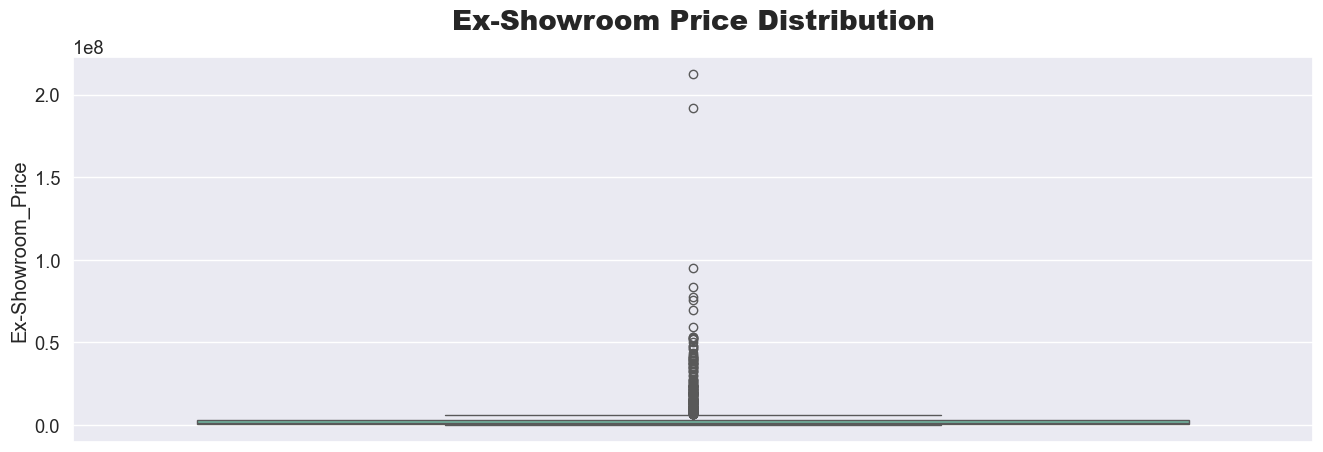

In [109]:
plt.figure(figsize=(16,5))
sns.boxplot(car["Ex-Showroom_Price"],palette="Set2")
plt.title("Ex-Showroom Price Distribution",fontweight="black",size=20,pad=20)
plt.show()

In [110]:
car[car["Ex-Showroom_Price"]>150000000][["Car Manufacturer","Car Model","Ex-Showroom_Price"]]

Car Manufacturer Car Model  Ex-Showroom_Price
355          Bugatti    Chiron          192142937
356          Bugatti    Chiron          212155397

In [111]:
car.drop([355,356],inplace=True)

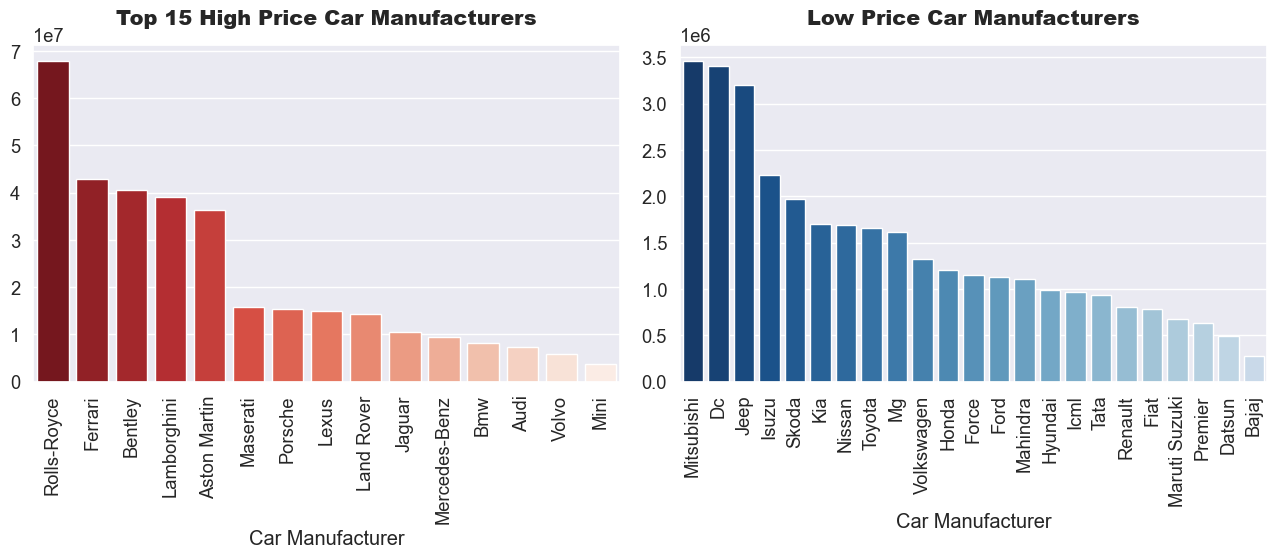

In [112]:
average_price1 = car.groupby(["Car Manufacturer"])["Ex-Showroom_Price"].mean().sort_values(ascending=False)[0:15]
average_price2 = car.groupby(["Car Manufacturer"])["Ex-Showroom_Price"].mean().sort_values(ascending=False)[15:]

plt.figure(figsize=(13,6))
plt.subplot(1,2,1)
sns.barplot(x=average_price1.index, y=average_price1.values, palette=sns.color_palette("Reds",15)[::-1])
plt.title("Top 15 High Price Car Manufacturers",fontweight="black",size=15, pad=15)

plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x=average_price2.index, y=average_price2.values, palette=sns.color_palette("Blues",30)[::-1])
plt.title("Low Price Car Manufacturers",fontweight="black",size=15, pad=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

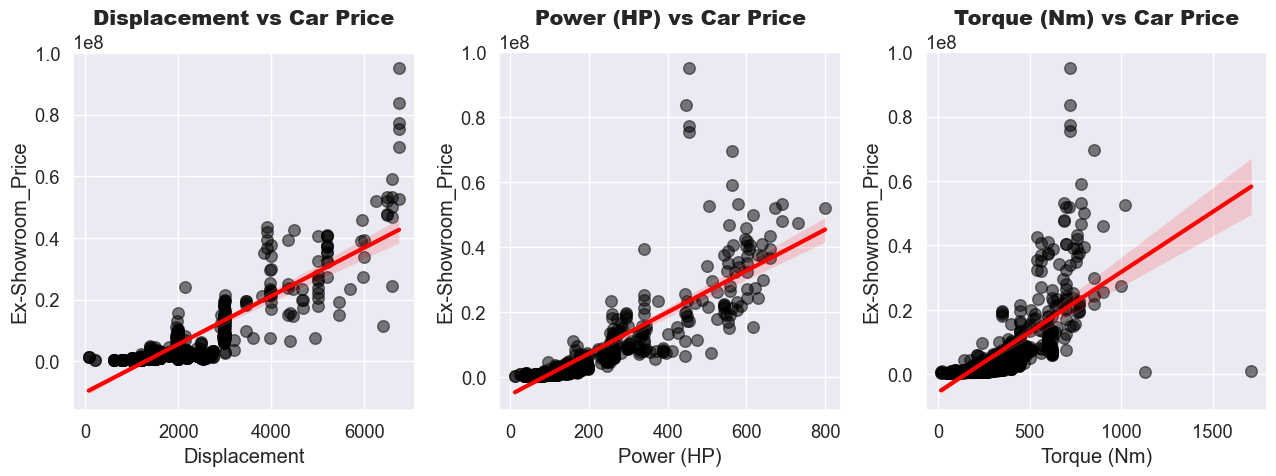

In [113]:
cols = ["Displacement","Power (HP)","Torque (Nm)"]


plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=car, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=15)
    plt.tight_layout()

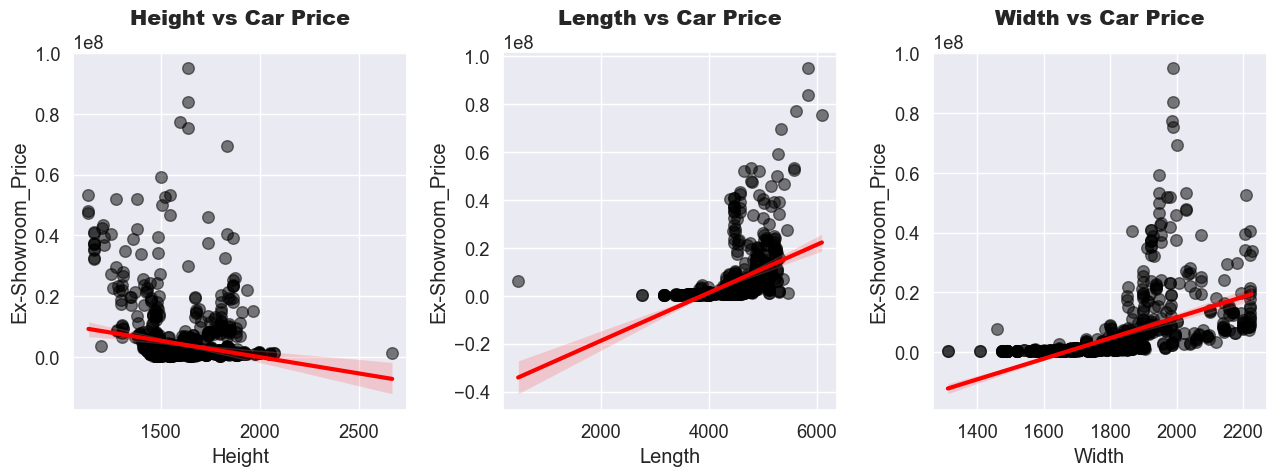

In [115]:
cols = ["Height","Length","Width"]


plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=car, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=15)
    plt.tight_layout()

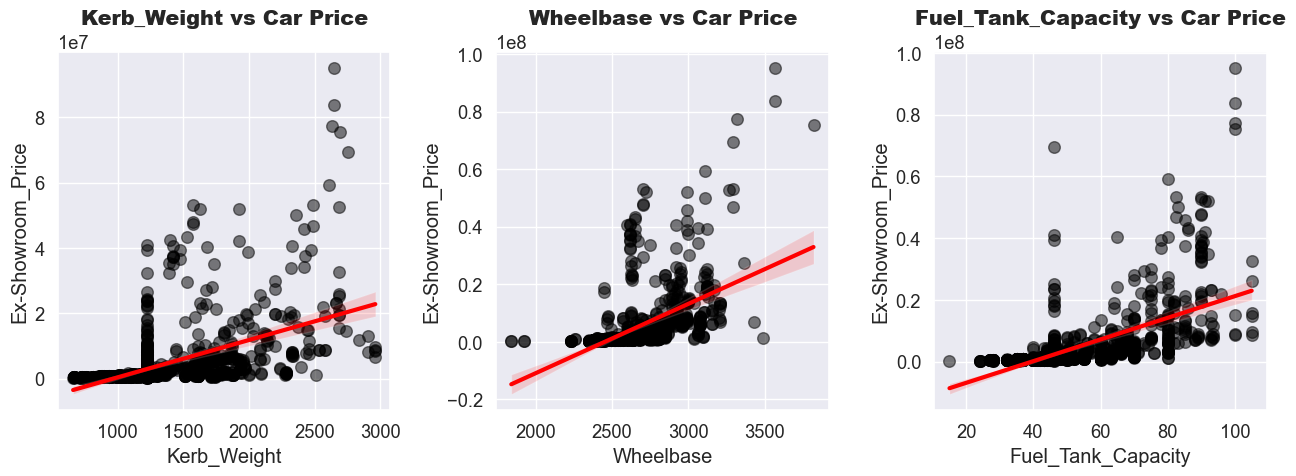

In [116]:
cols = ["Kerb_Weight","Wheelbase","Fuel_Tank_Capacity"]


plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=car, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=15)
    plt.tight_layout()

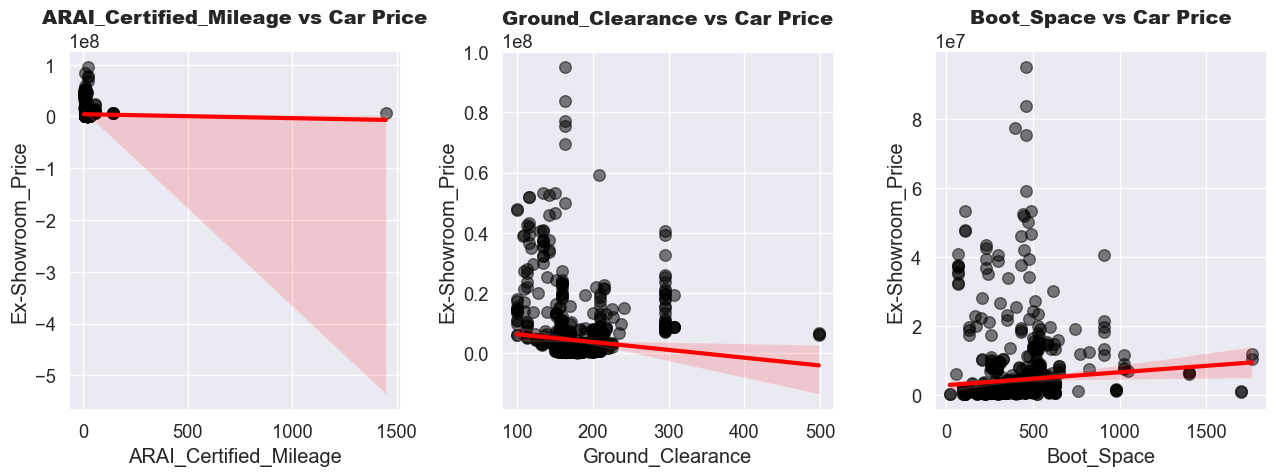

In [117]:
cols = ["ARAI_Certified_Mileage","Ground_Clearance","Boot_Space"]


plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=car, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=14)
    plt.tight_layout()

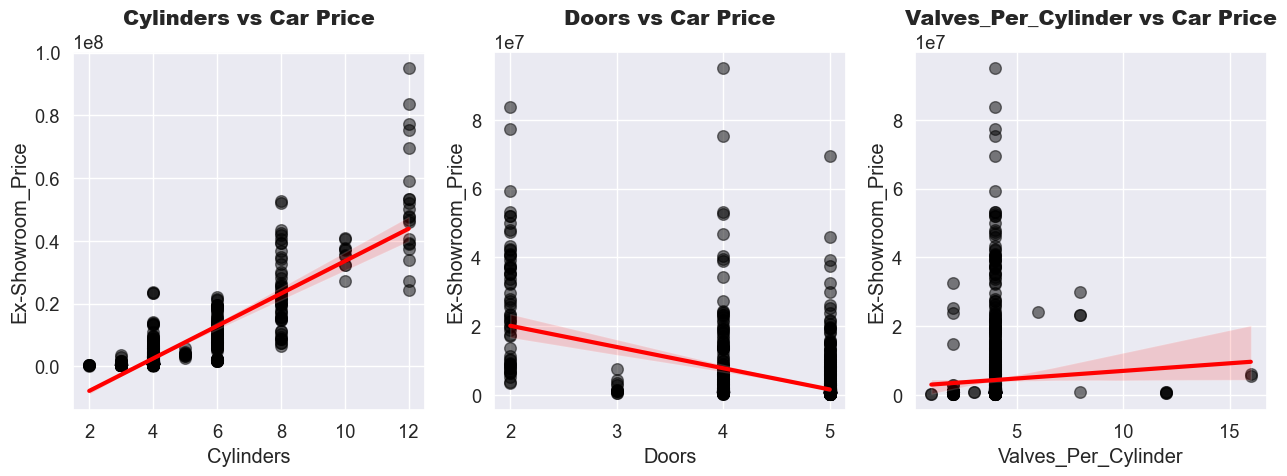

In [118]:
cols = ['Cylinders','Doors','Valves_Per_Cylinder']

plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=car, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
    plt.title(f"{column} vs Car Price",pad=20,fontweight="black",size=15)
    plt.tight_layout()

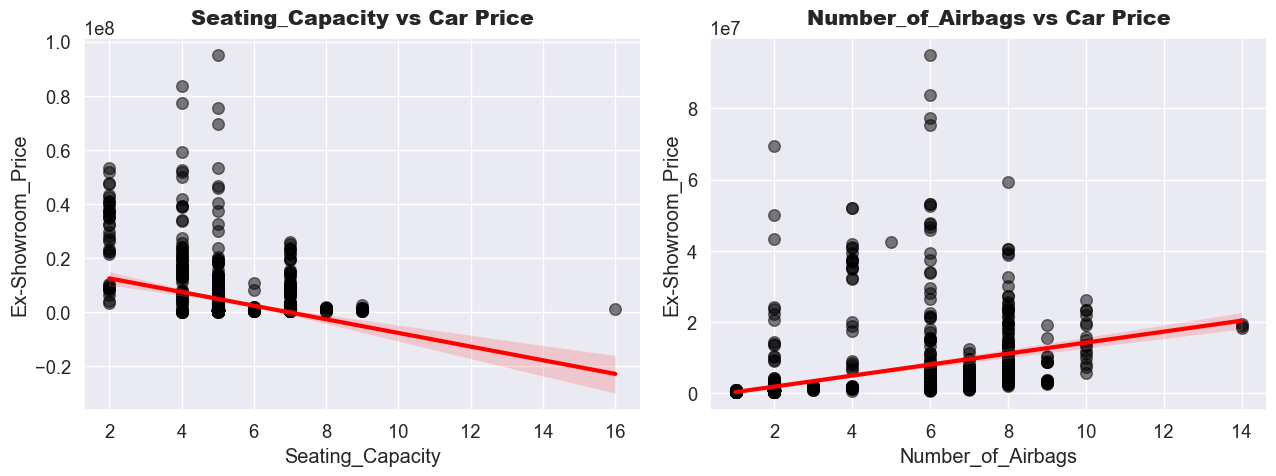

In [119]:
cols =['Seating_Capacity','Number_of_Airbags']

plt.figure(figsize=(13,5))
for index, column in enumerate(cols):
    plt.subplot(1,2,index+1)
    sns.regplot(x=column, y="Ex-Showroom_Price", data=car, color="black", scatter_kws={'s': 70, 'alpha': 0.5}, 
                line_kws={'color': 'red', 'lw': 3})
   
    plt.title(f"{column} vs Car Price",pad=10,fontweight="black",size=15)
    plt.tight_layout()

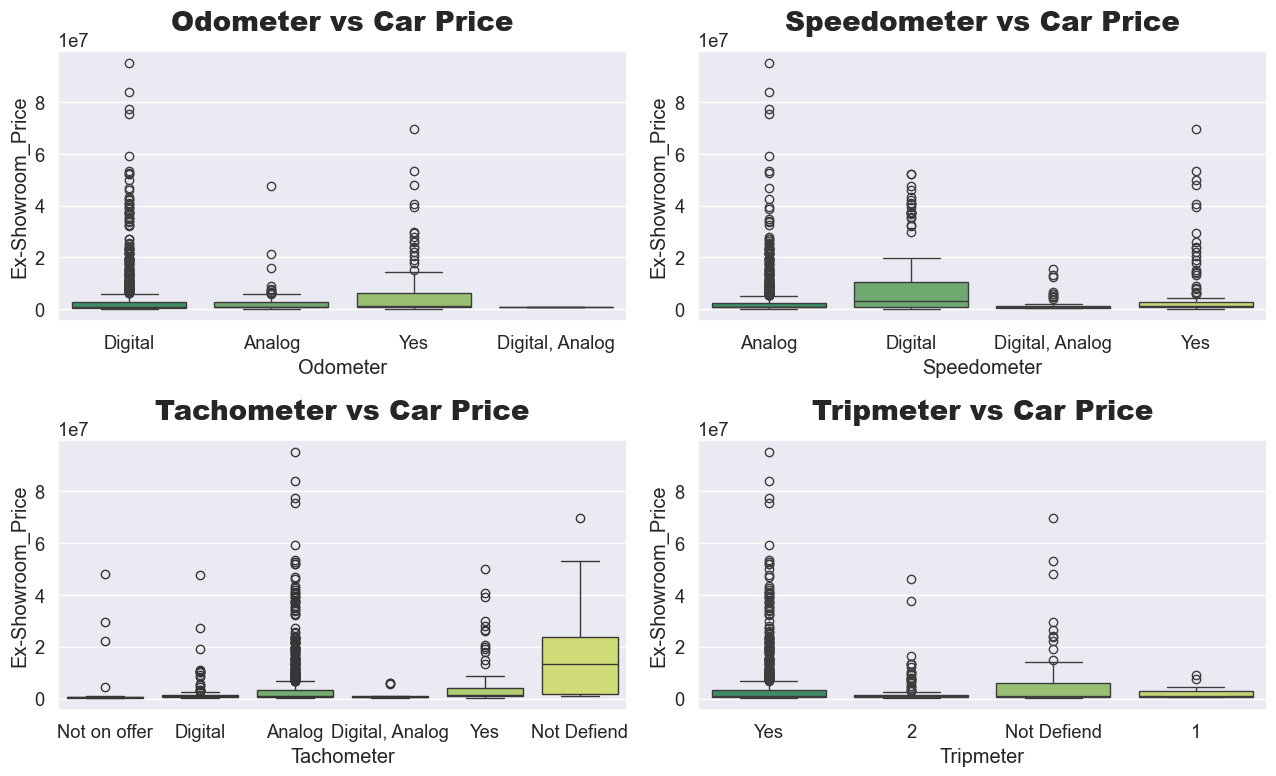

In [120]:
cols = ["Odometer","Speedometer","Tachometer","Tripmeter"]

plt.figure(figsize=(13,8))
for index,column in enumerate(cols):
    plt.subplot(2,2,index+1)
    sns.boxplot(x=car[column], y=car["Ex-Showroom_Price"],palette="summer")
    plt.title(f"{column} vs Car Price",fontweight="black",size=20,pad=15)
    plt.tight_layout()

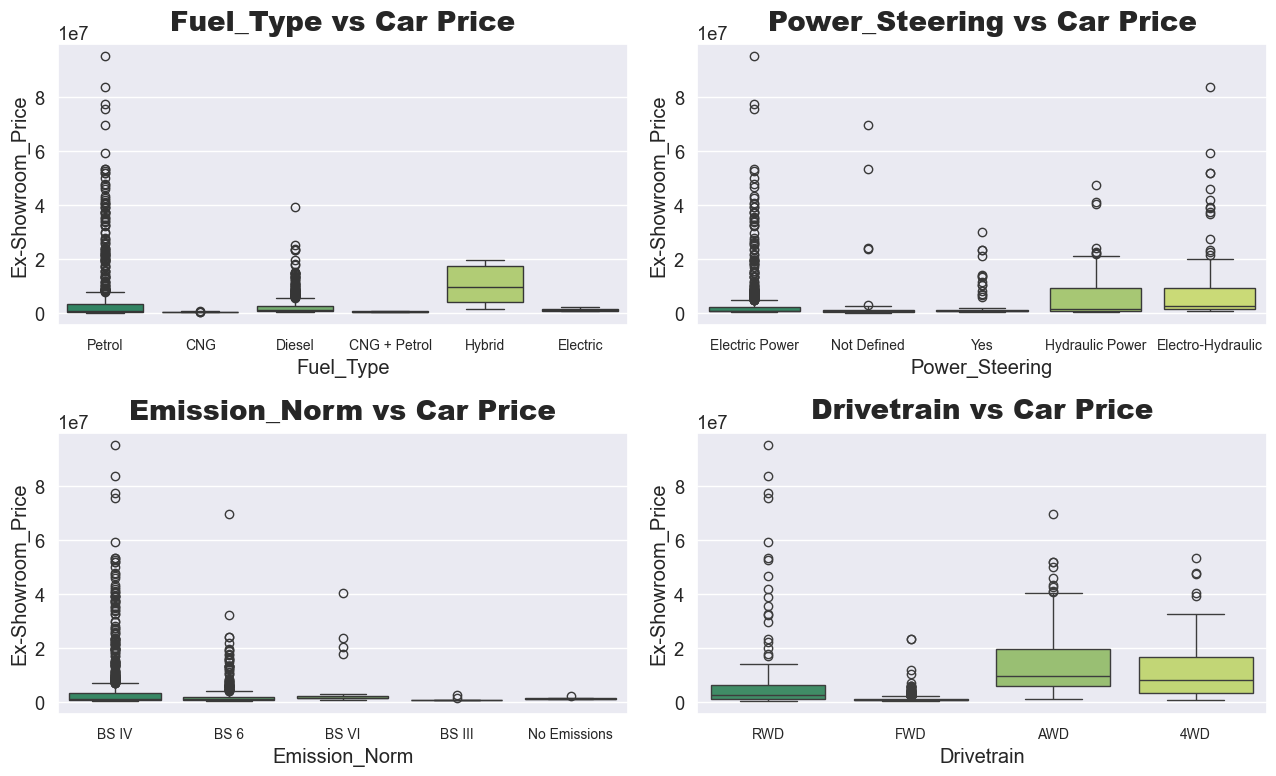

In [121]:
cols = ["Fuel_Type","Power_Steering","Emission_Norm","Drivetrain"]

plt.figure(figsize=(13,8))
for index,column in enumerate(cols):
    plt.subplot(2,2,index+1)
    sns.boxplot(x=car[column],y=car["Ex-Showroom_Price"],palette="summer")
    plt.title(f"{column} vs Car Price",fontweight="black",size=20,pad=10)
    plt.xticks(size=10)
    plt.tight_layout()

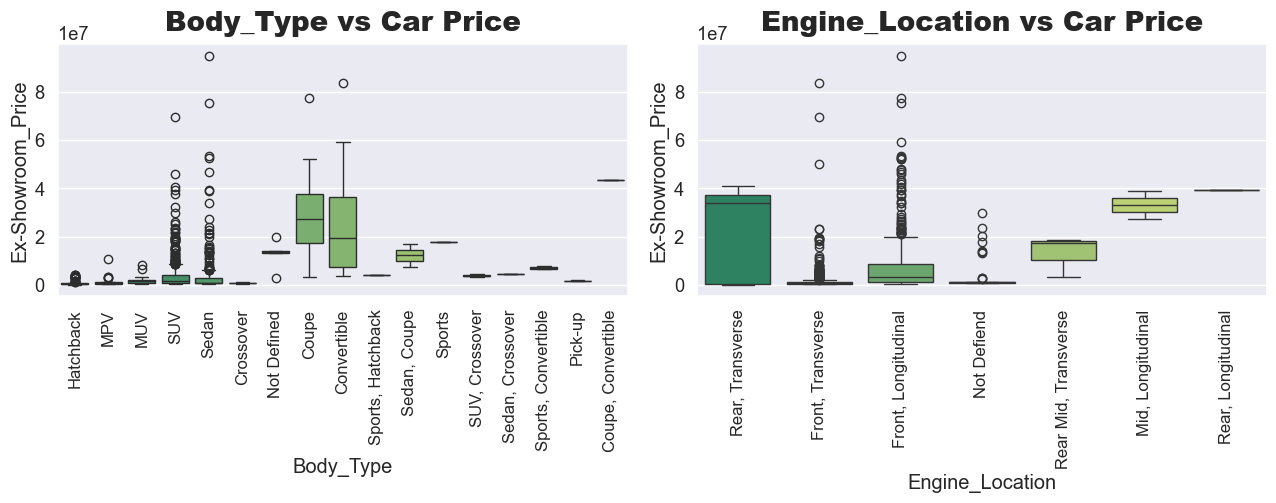

In [122]:
cols = ["Body_Type","Engine_Location"]

plt.figure(figsize=(13,8))
for index,column in enumerate(cols):
    plt.subplot(2,2,index+1)
    sns.boxplot(x=car[column], y=car["Ex-Showroom_Price"],palette="summer")
    plt.title(f"{column} vs Car Price",fontweight="black",size=20,pad=10)
    plt.xticks(size=12,rotation=90)
    plt.tight_layout()

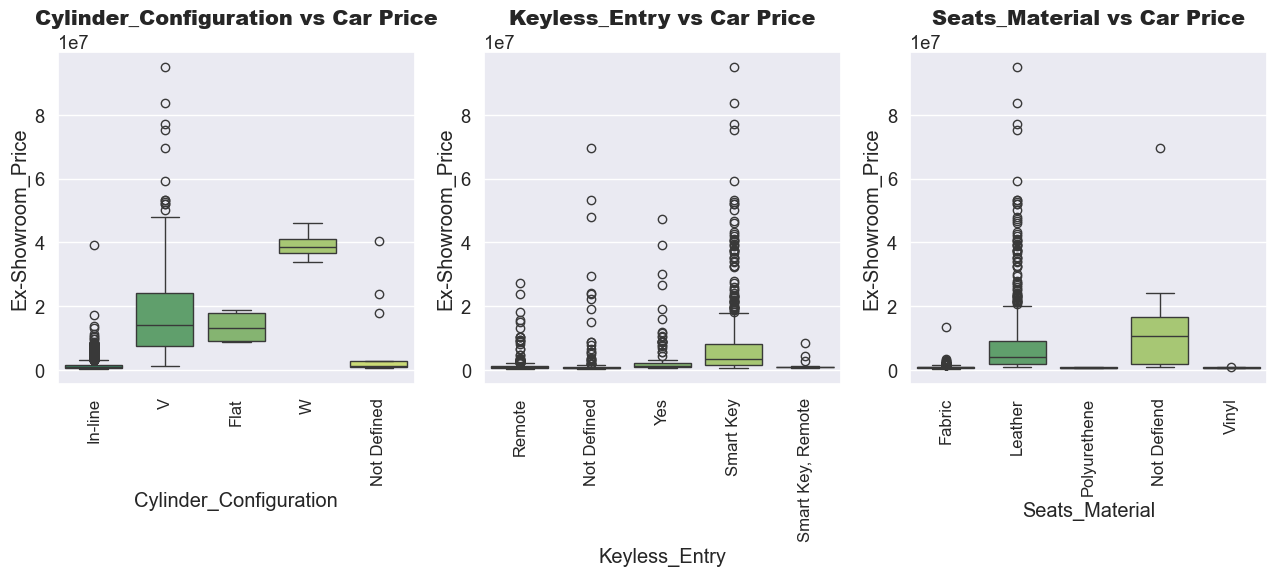

In [123]:
cols = ["Cylinder_Configuration","Keyless_Entry","Seats_Material"]

plt.figure(figsize=(13,6))
for index,column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.boxplot(x=car[column], y=car["Ex-Showroom_Price"],palette="summer")
    plt.title(f"{column} vs Car Price",fontweight="black",size=15,pad=20)
    plt.xticks(size=12,rotation=90)
    plt.tight_layout()

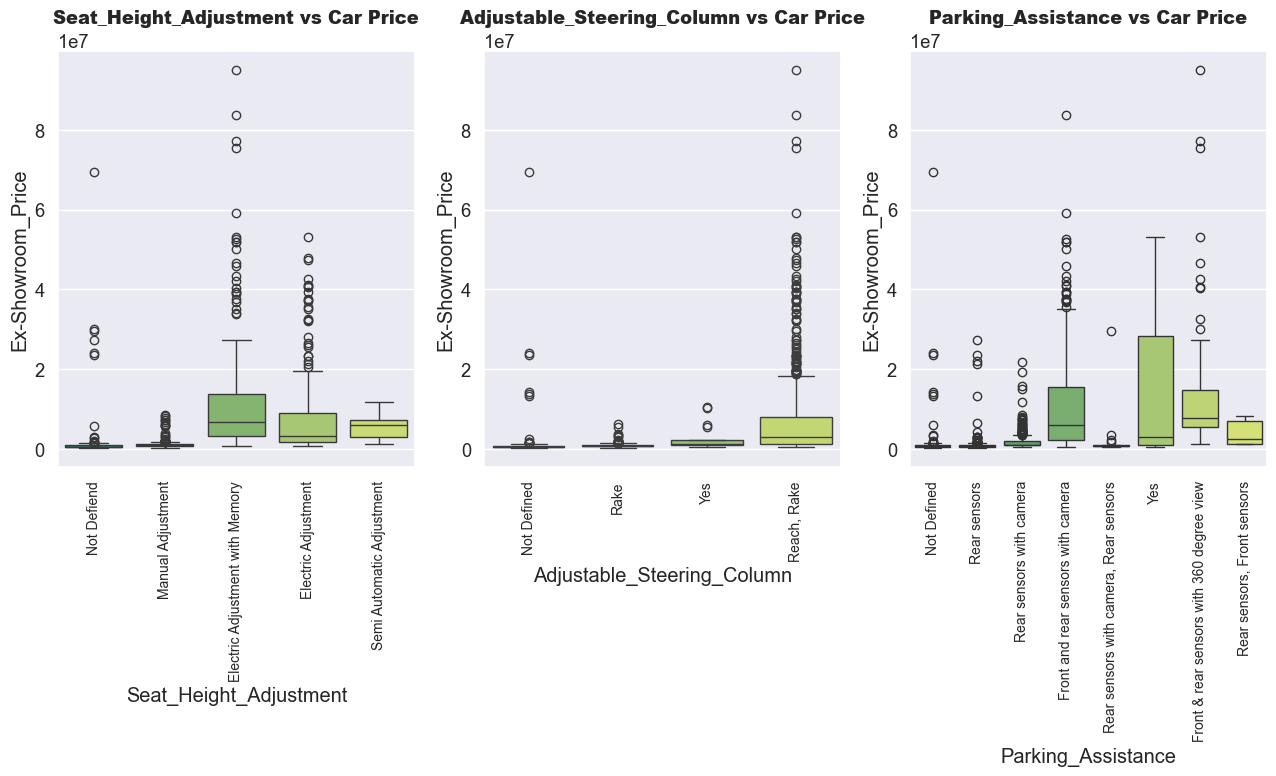

In [124]:
cols = ["Seat_Height_Adjustment","Adjustable_Steering_Column","Parking_Assistance"]

plt.figure(figsize=(13,8))
for index,column in enumerate(cols):
    plt.subplot(1,3,index+1)
    sns.boxplot(x=car[column], y=car["Ex-Showroom_Price"],palette="summer")
    plt.title(f"{column} vs Car Price",fontweight="black",size=13,pad=20)
    plt.xticks(rotation=90,size=10)
    plt.tight_layout()

In [125]:
cols = ['Central_Locking','Child_Safety_Locks','Low_Fuel_Warning','Third_Row_AC_Vents','Second_Row_AC_Vents',
        'Auto-Dimming_Rear-View_Mirror','Engine_Immobilizer','ABS_(Anti-lock_Braking_System)',
        'EBD_(Electronic_Brake-force_Distribution)','Cooled_Glove_Box','EBA_(Electronic_Brake_Assist)',
        'ESP_(Electronic_Stability_Program)','Gear_Shift_Reminder','Key_Off_Reminder','USB_Compatibility',
        'Bluetooth','Navigation_System','Turbocharger',"Automatic_Headlamps","Cruise_Control"]

In [126]:
x = car[cols]
y = car["Ex-Showroom_Price"]
abc = LabelEncoder()
x[cols] = x[cols].apply(abc.fit_transform)
selector = SelectKBest(score_func=f_regression, k=5) 
selector.fit(x, y)

SelectKBest(k=5, score_func=<function f_regression at 0x0000023EBB4302C0>)

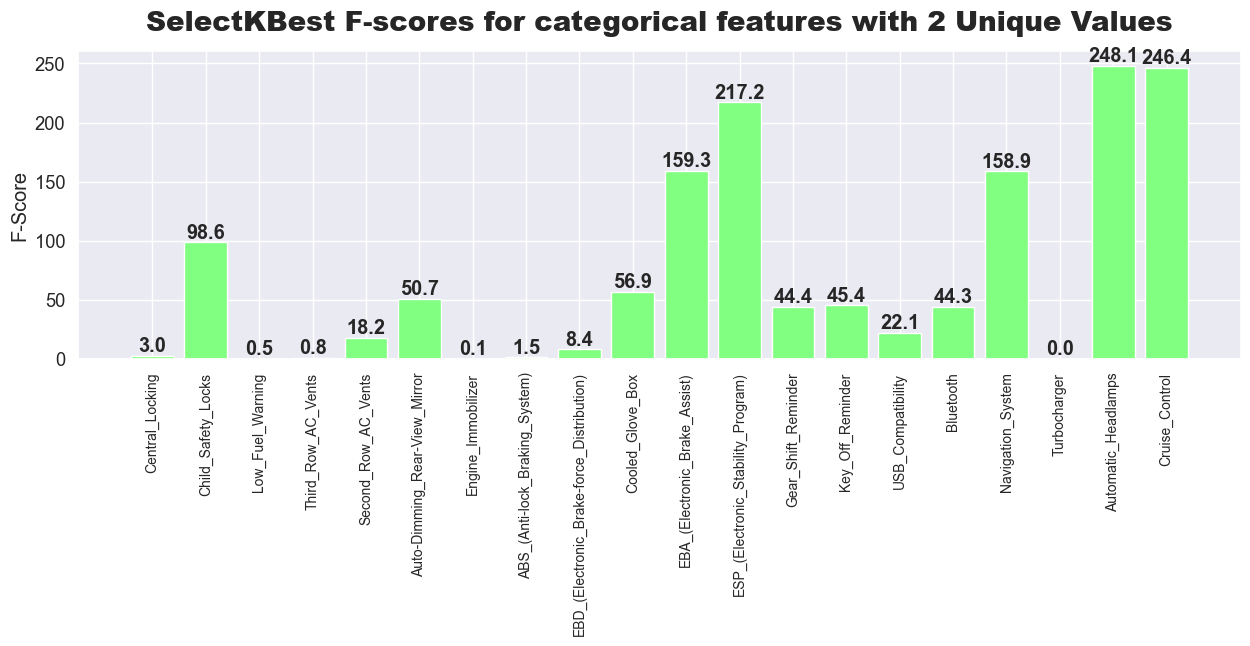

In [127]:
scores = selector.scores_
feature_names = x.columns

plt.figure(figsize=(15, 4))
plt.bar(feature_names,scores,color=(0.5, 1.0, 0.5))
for index,value in enumerate(scores):
    plt.text(index,value,round(value,1),ha="center",fontweight="bold",va="bottom")
plt.ylabel('F-Score')
plt.xticks(rotation=90,size=10)
plt.title('SelectKBest F-scores for categorical features with 2 Unique Values',pad=15,fontweight="black",size=20)
plt.show()

In [128]:
useful_features_1 = x.columns[selector.get_support(indices=True)]
useful_features_1

Index(['EBA_(Electronic_Brake_Assist)', 'ESP_(Electronic_Stability_Program)',
       'Navigation_System', 'Automatic_Headlamps', 'Cruise_Control'],
      dtype='object')

In [129]:
cols = ["Odometer","Speedometer","Tachometer","Tripmeter","Fuel_Type","Power_Steering","Emission_Norm","Drivetrain",
        "Body_Type","Engine_Location","Cylinder_Configuration","Keyless_Entry","Seats_Material",
        "Seat_Height_Adjustment","Adjustable_Steering_Column","Parking_Assistance"]

In [130]:
x = car[cols]
y = car["Ex-Showroom_Price"]
abc = LabelEncoder()
x[cols] = x[cols].apply(abc.fit_transform)
selector = SelectKBest(score_func = f_regression, k=5)
selector.fit(x,y)

SelectKBest(k=5, score_func=<function f_regression at 0x0000023EBB4302C0>)

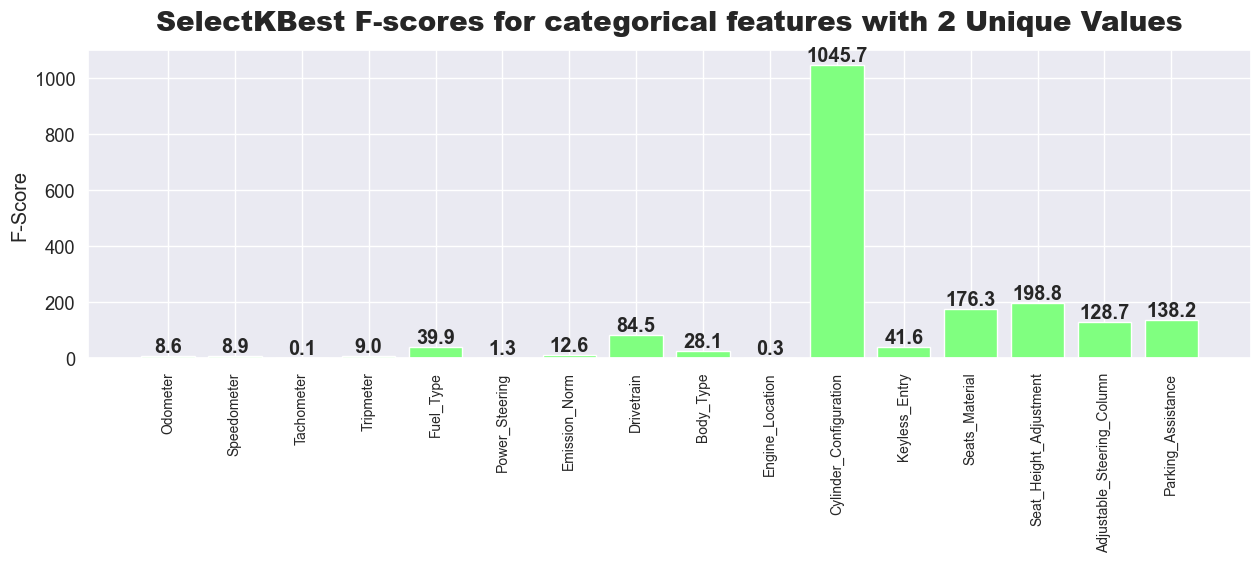

In [131]:
scores = selector.scores_
feature_names = x.columns

plt.figure(figsize=(15, 4))
plt.bar(feature_names,scores,color=(0.5, 1.0, 0.5))
for index,value in enumerate(scores):
    plt.text(index,value,round(value,1),ha="center",fontweight="bold",va="bottom")
plt.ylabel('F-Score')
plt.xticks(rotation=90,size=10)
plt.title('SelectKBest F-scores for categorical features with 2 Unique Values',pad=15,fontweight="black",size=20)
plt.show()

In [132]:
useful_features_2 = x.columns[selector.get_support(indices=True)]
useful_features_2

Index(['Cylinder_Configuration', 'Seats_Material', 'Seat_Height_Adjustment',
       'Adjustable_Steering_Column', 'Parking_Assistance'],
      dtype='object')

In [133]:
cols = ['Cylinders','Doors','Valves_Per_Cylinder','Seating_Capacity','Number_of_Airbags']
x = car[cols]
y = car["Ex-Showroom_Price"]
selector = SelectKBest(score_func=f_regression,k=1)
selector.fit(x,y)

SelectKBest(k=1, score_func=<function f_regression at 0x0000023EBB4302C0>)

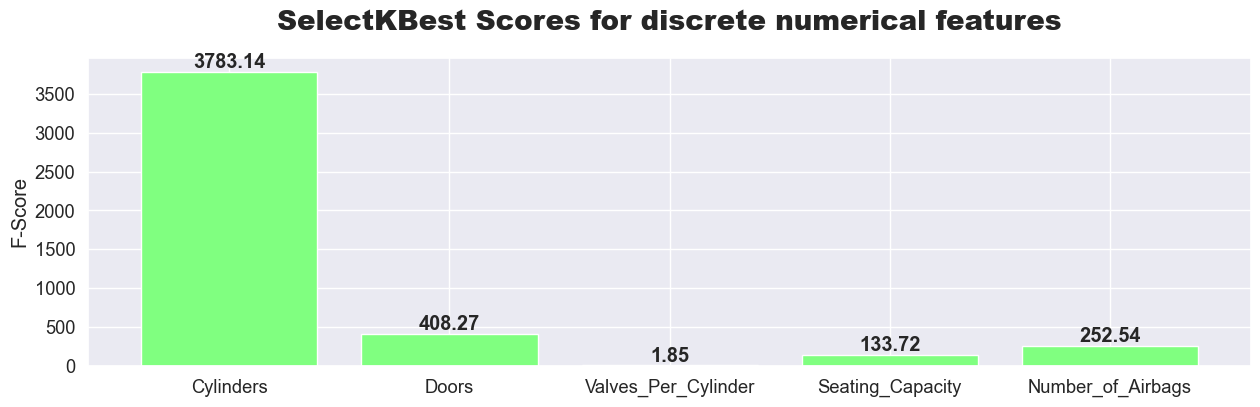

In [134]:
scores = selector.scores_
feature_names = x.columns

plt.figure(figsize=(15, 4))
plt.bar(feature_names, scores,color=(0.5, 1.0, 0.5))
for index,value in enumerate(scores):
    plt.text(index,value,round(value,2),ha="center",fontweight="bold",va="bottom")
plt.ylabel('F-Score')
plt.title('SelectKBest Scores for discrete numerical features',pad=20,fontweight="black",size=20)
plt.show()

In [135]:
useful_features_3 = x.columns[selector.get_support(indices=True)]
useful_features_3

Index(['Cylinders'], dtype='object')

In [136]:
cols = ["Displacement","Power (HP)","Torque (Nm)","Height","Length","Width","Kerb_Weight","Wheelbase","Fuel_Tank_Capacity",
        "ARAI_Certified_Mileage","Ground_Clearance","Boot_Space",'Ex-Showroom_Price']

In [137]:
new_car = car[cols]
corr = new_car.corr()["Ex-Showroom_Price"].to_frame().rename(columns={"Ex-Showroom_Price":"Correlation with Price"})

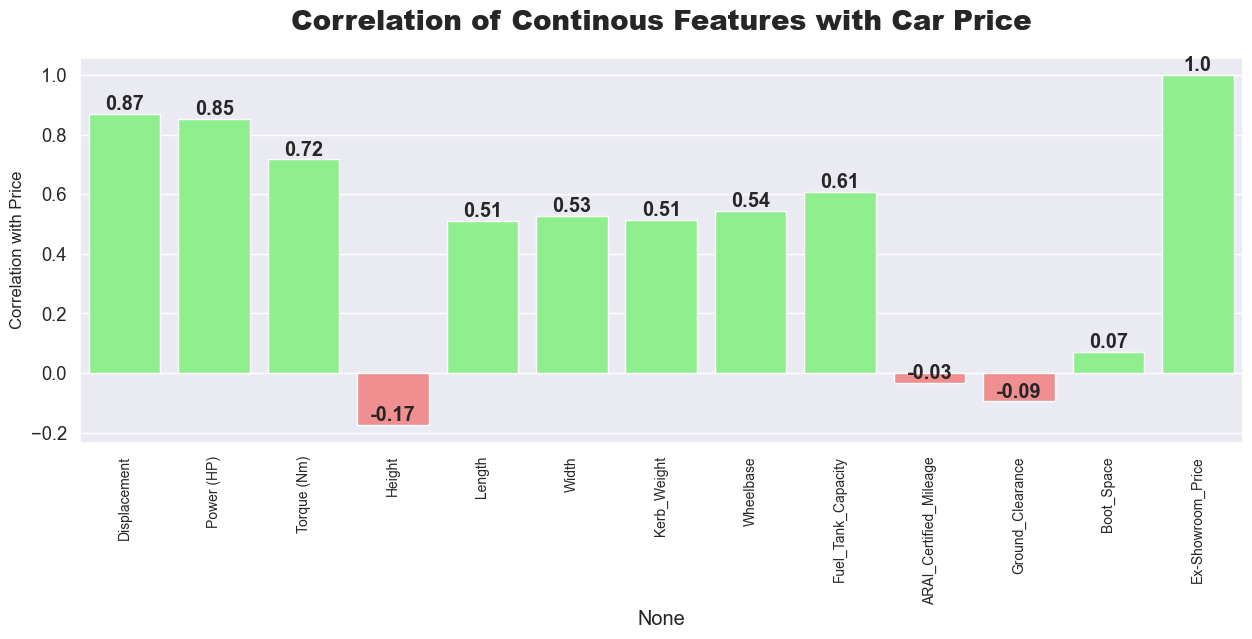

In [138]:
positive_color = (0.5, 1.0, 0.5)
negative_color = (1.0, 0.5, 0.5)
colors = [positive_color if c >= 0 else negative_color for c in corr["Correlation with Price"]]

plt.figure(figsize=(15,5))
ax = sns.barplot(x=corr.index,y=corr["Correlation with Price"],palette=colors)
for i, val in enumerate(corr["Correlation with Price"]):
    ax.text(i, val, round(val, 2), ha='center', va='bottom', fontweight='bold')
plt.title("Correlation of Continous Features with Car Price",fontweight="black",size=20,pad=20)
plt.ylabel("Correlation with Price",size=12)
plt.xticks(rotation=90,size=10)
plt.show()

In [139]:
useful_features_4 = ["Displacement","Power (HP)","Torque (Nm)","Length","Width","Kerb_Weight","Wheelbase",
                    "Fuel_Tank_Capacity","ARAI_Certified_Mileage",'Ex-Showroom_Price']

In [140]:
useful_cols = []
useful_cols.extend(useful_features_1.tolist())
useful_cols.extend(useful_features_2.tolist())
useful_cols.extend(useful_features_3.tolist())
useful_cols.extend(useful_features_4)
car = car[useful_cols]
car.sample(5)

EBA_(Electronic_Brake_Assist) ESP_(Electronic_Stability_Program)  \
976                    Not Defiend                        Not Defiend   
1057                           Yes                                Yes   
207                    Not Defiend                        Not Defiend   
675                            Yes                                Yes   
867                            Yes                                Yes   

     Navigation_System Automatic_Headlamps Cruise_Control  \
976        Not Defiend                 Yes            Yes   
1057               Yes                 Yes            Yes   
207        Not Defiend         Not Defiend    Not Defiend   
675                Yes                 Yes            Yes   
867                Yes                 Yes            Yes   

     Cylinder_Configuration Seats_Material           Seat_Height_Adjustment  \
976                 In-line         Fabric                Manual Adjustment   
1057                      V        Leather  Electric Adjustment with Memory   
207                 In-line         Fabric                Manual Adjustment   
675                 In-line         Fabric              Electric Adjustment   
867                       V        Leather              Electric Adjustment   

     Adjustable_Steering_Column                  Parking_Assistance  \
976                        Rake            Rear sensors with camera   
1057                Reach, Rake  Front and rear sensors with camera   
207                        Rake                         Not Defined   
675                 Reach, Rake            Rear sensors with camera   
867                 Reach, Rake  Front and rear sensors with camera   

      Cylinders  Displacement  Power (HP)  Torque (Nm)  Length   Width  \
976         4.0        1493.0      113.43        250.0  4315.0  1800.0   
1057       12.0        5935.0      552.34        630.0  5019.0  1929.0   
207         4.0        1197.0       78.91        104.0  3895.0  1735.0   
675         4.0        2179.0      138.08        320.0  4585.0  1890.0   
867        10.0        5204.0      578.92        540.0  4459.0  1924.0   

      Kerb_Weight  Wheelbase  Fuel_Tank_Capacity  ARAI_Certified_Mileage  \
976        1225.0     2610.0                60.0                   20.00   
1057       1990.0     2989.0                90.5                   12.90   
207         935.0     2460.0                45.0                   17.71   
675        1785.0     2700.0                70.0                   13.85   
867        1389.0     2620.0                90.0                   11.24   

      Ex-Showroom_Price  
976             1254000  
1057           38845823  
207              650000  
675             1610180  
867            35535000

In [141]:
cols = ["Displacement","Power (HP)","Torque (Nm)","Length","Width","Kerb_Weight","Wheelbase",
        "Fuel_Tank_Capacity","ARAI_Certified_Mileage",'Ex-Showroom_Price']

In [142]:
car[cols].skew().to_frame().rename(columns={0:"Skewness"})

Skewness
Displacement             2.475382
Power (HP)               2.425332
Torque (Nm)              1.722587
Length                  -0.174612
Width                    0.772992
Kerb_Weight              1.354881
Wheelbase                0.990579
Fuel_Tank_Capacity       1.009603
ARAI_Certified_Mileage  33.293933
Ex-Showroom_Price        4.529864

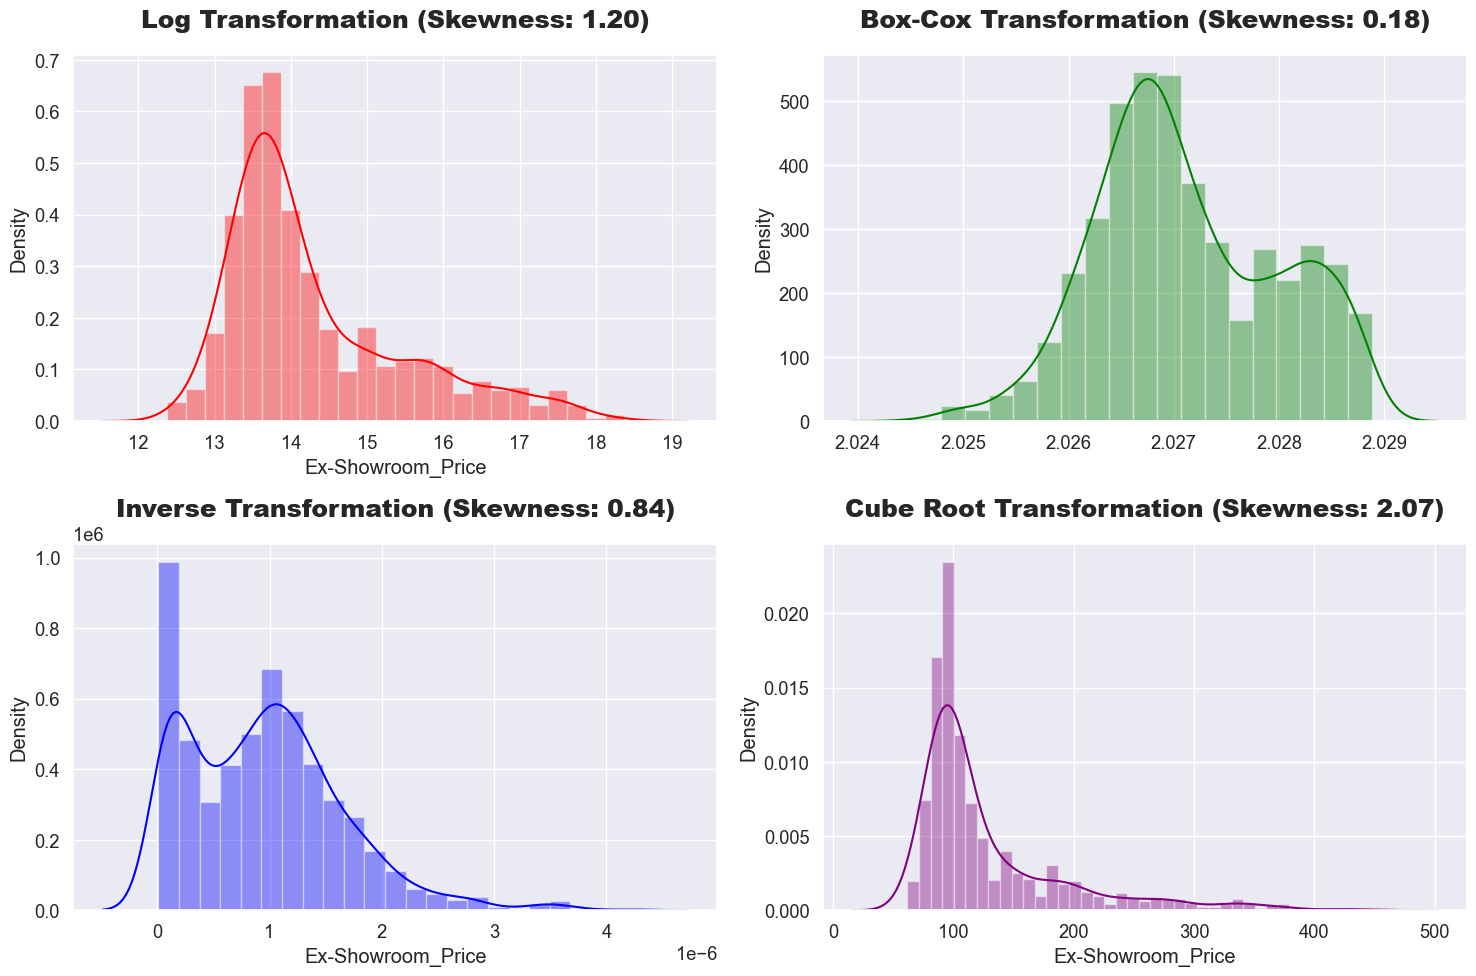

In [143]:
import numpy as np
import scipy.stats as stats

plt.figure(figsize=(15, 10))

# Log Transformation
transformed_log = np.log(car["Ex-Showroom_Price"])
skewness_log = stats.skew(transformed_log)
plt.subplot(2, 2, 1)
sns.distplot(transformed_log, kde=True, color="red")
plt.title(f"Log Transformation (Skewness: {skewness_log:.2f})", fontweight="black", size=18, pad=20)

# Box-Cox Transformation
transformed_boxcox, lambda_param = stats.boxcox(car["Ex-Showroom_Price"])
skewness_boxcox = stats.skew(transformed_boxcox)
plt.subplot(2, 2, 2)
sns.distplot(transformed_boxcox, kde=True, color="green")
plt.title(f"Box-Cox Transformation (Skewness: {skewness_boxcox:.2f})", fontweight="black", size=18, pad=20)

# Inverse Transformation
transformed_inverse = 1 / car["Ex-Showroom_Price"]
skewness_inverse = stats.skew(transformed_inverse)
plt.subplot(2, 2, 3)
sns.distplot(transformed_inverse, kde=True, color="blue")
plt.title(f"Inverse Transformation (Skewness: {skewness_inverse:.2f})", fontweight="black", size=18, pad=20)

# Cube Root Transformation
transformed_cbrt = np.cbrt(car["Ex-Showroom_Price"])
skewness_cbrt = stats.skew(transformed_cbrt)
plt.subplot(2, 2, 4)
sns.distplot(transformed_cbrt, kde=True, color="purple")
plt.title(f"Cube Root Transformation (Skewness: {skewness_cbrt:.2f})", fontweight="black", size=18, pad=20)

plt.tight_layout()
plt.show()

In [144]:
for column in cols:
    car[column], lamda_param = stats.boxcox(car[column])
car[cols].skew().to_frame().rename(columns={0:"Skewness"})

Skewness
Displacement           -0.001349
Power (HP)             -0.104279
Torque (Nm)             0.000079
Length                  0.126155
Width                   0.000000
Kerb_Weight            -0.007802
Wheelbase               0.000000
Fuel_Tank_Capacity      0.000591
ARAI_Certified_Mileage -0.243771
Ex-Showroom_Price       0.184044

In [146]:
cat_cols = car.select_dtypes(include=["object"]).columns
car = pd.get_dummies(car,columns=cat_cols)
car.sample(5)

Cylinders  Displacement  Power (HP)  Torque (Nm)        Length     Width  \
520        4.0      7.272940    2.134793     5.611761  53322.543374  0.771387   
176        4.0      7.273601    2.134793     5.571820  53340.548873  0.771382   
76         4.0      7.051597    2.087951     4.764271  48098.189695  0.771382   
227        4.0      7.053250    2.101962     4.736944  52621.557139  0.771383   
365        3.0      6.647639    1.980546     4.263678  43682.265690  0.771373   

     Kerb_Weight  Wheelbase  Fuel_Tank_Capacity  ARAI_Certified_Mileage  \
520     1.765285   0.604896            1.918289                2.319977   
176     1.762067   0.604896            1.923004                2.267327   
76      1.765285   0.604896            1.846563                2.248248   
227     1.762027   0.604896            1.897798                2.174250   
365     1.754665   0.604896            1.867705                2.276680   

     Ex-Showroom_Price  EBA_(Electronic_Brake_Assist)_Not Defiend  \
520           2.027066                                       True   
176           2.026637                                       True   
76            2.026200                                       True   
227           2.026532                                       True   
365           2.025642                                       True   

     EBA_(Electronic_Brake_Assist)_Yes  \
520                              False   
176                              False   
76                               False   
227                              False   
365                              False   

     ESP_(Electronic_Stability_Program)_Not Defiend  \
520                                            True   
176                                            True   
76                                             True   
227                                            True   
365                                            True   

     ESP_(Electronic_Stability_Program)_Yes  Navigation_System_Not Defiend  \
520                                   False                          False   
176                                   False                          False   
76                                    False                           True   
227                                   False                           True   
365                                   False                           True   

     Navigation_System_Yes  Automatic_Headlamps_Not Defiend  \
520                   True                             True   
176                   True                             True   
76                   False                             True   
227                  False                             True   
365                  False                             True   

     Automatic_Headlamps_Yes  Cruise_Control_Not Defiend  Cruise_Control_Yes  \
520                    False                        True               False   
176                    False                       False                True   
76                     False                        True               False   
227                    False                        True               False   
365                    False                        True               False   

     Cylinder_Configuration_Flat  Cylinder_Configuration_In-line  \
520                        False                            True   
176                        False                            True   
76                         False                            True   
227                        False                            True   
365                        False                            True   

     Cylinder_Configuration_Not Defined  Cylinder_Configuration_V  \
520                               False                     False   
176                               False                     False   
76                                False                     False   
227                               False               

In [147]:
X = car.drop(columns="Ex-Showroom_Price")
y = car["Ex-Showroom_Price"]
X.shape

(1274, 47)

In [148]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_scaled = scaler.fit_transform(X)

In [149]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)
print("Dimension of x_train:=>",x_train.shape)
print("Dimension of x_test:=>",x_test.shape)
print("Dimension of y_train:=>",y_train.shape)
print("Dimension of y_test:=>",y_test.shape)

Dimension of x_train:=> (1019, 47)
Dimension of x_test:=> (255, 47)
Dimension of y_train:=> (1019,)
Dimension of y_test:=> (255,)


## Model Creation and Evaluation

In [150]:
r2score = []
adj_r2_score = []
mae_score = []
mse_score = []
rmse_score = []
mpe_score = []
mape_score = []

In [151]:
def model_evaluation(model):
    model.fit(x_train, y_train)
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    n= len(y)
    k = X.shape[1]
    
    #Metric Calculation
    r2 = r2_score(y_test, y_test_pred)
    adj_r2 = 1 - ((1-r2)*(n-1)/(n-k-1))
    mae = mean_absolute_error(y_test,y_test_pred)
    mse = mean_squared_error(y_test,y_test_pred)
    rmse = np.sqrt(mse)
    mpe = np.mean((y_test - y_test_pred) / y_test) * 100
    mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    
    #Appending Metric Value
    r2score.append(r2)
    adj_r2_score.append(adj_r2)
    mae_score.append(mae)
    mse_score.append(mse)
    rmse_score.append(rmse)
    mpe_score.append(mpe)
    mape_score.append(mape)
    
    #Returning Metric Value
    print("-"*127)
    print("R-squared:", r2)
    print("Adjusted R-Squared",adj_r2)
    print()
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("Mean Percentage Error (MPE):", mpe)
    print("Mean Absolute Percentage Error (MAPE):", mape)
    print("-"*127)
    
    #Scatter plot
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(y_train, y_train_pred, color='blue', label='Train')
    plt.scatter(y_test, y_test_pred, color='red', label='Test')
    plt.xlabel('True values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.title('Scatter Plot', fontweight="black", size=20, pad=10)
    
    # Residual plot
    plt.subplot(1, 2, 2)
    plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', label='Train')
    plt.scatter(y_test_pred, y_test_pred - y_test, color='red', label='Test')
    plt.axhline(y=0, color='black', linestyle='--')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend()
    plt.title('Residual Plot', fontweight="black", size=20, pad=10)

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.951870936998246
Adjusted R-Squared 0.9500258587265638

Mean Absolute Error (MAE): 0.00014409668968568665
Mean Squared Error (MSE): 3.6158730628429625e-08
Root Mean Squared Error (RMSE): 0.00019015449147582507
Mean Percentage Error (MPE): -0.000738722545219576
Mean Absolute Percentage Error (MAPE): 0.0071083350900360345
-------------------------------------------------------------------------------------------------------------------------------


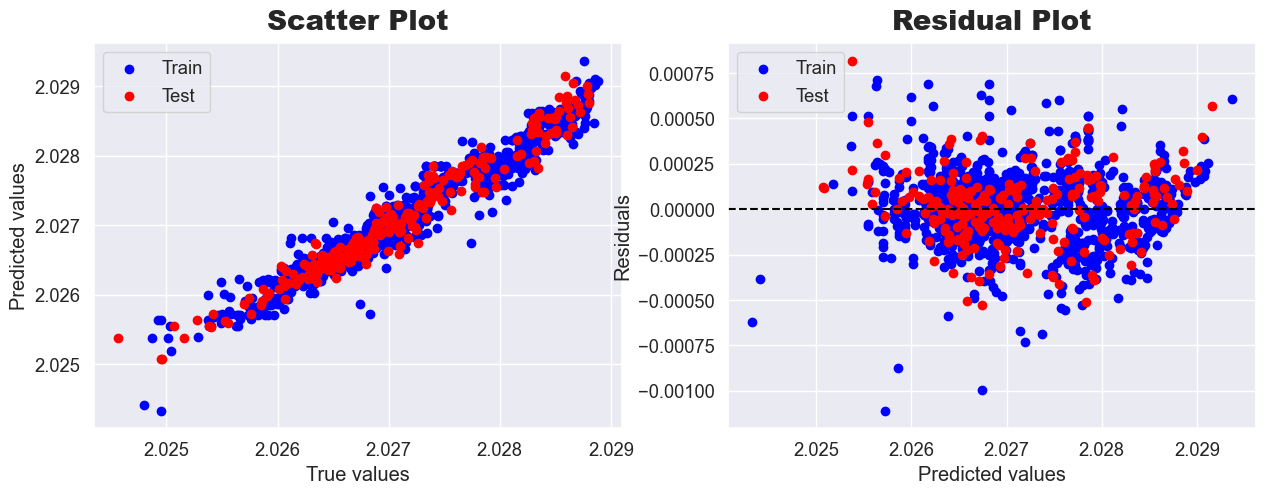

In [152]:
model_evaluation(LinearRegression())

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9521561166091224
Adjusted R-Squared 0.9503219709978897

Mean Absolute Error (MAE): 0.0001439943700283681
Mean Squared Error (MSE): 3.594447894582319e-08
Root Mean Squared Error (RMSE): 0.00018959029233012745
Mean Percentage Error (MPE): -0.0007192971827045648
Mean Absolute Percentage Error (MAPE): 0.007103306037627203
-------------------------------------------------------------------------------------------------------------------------------


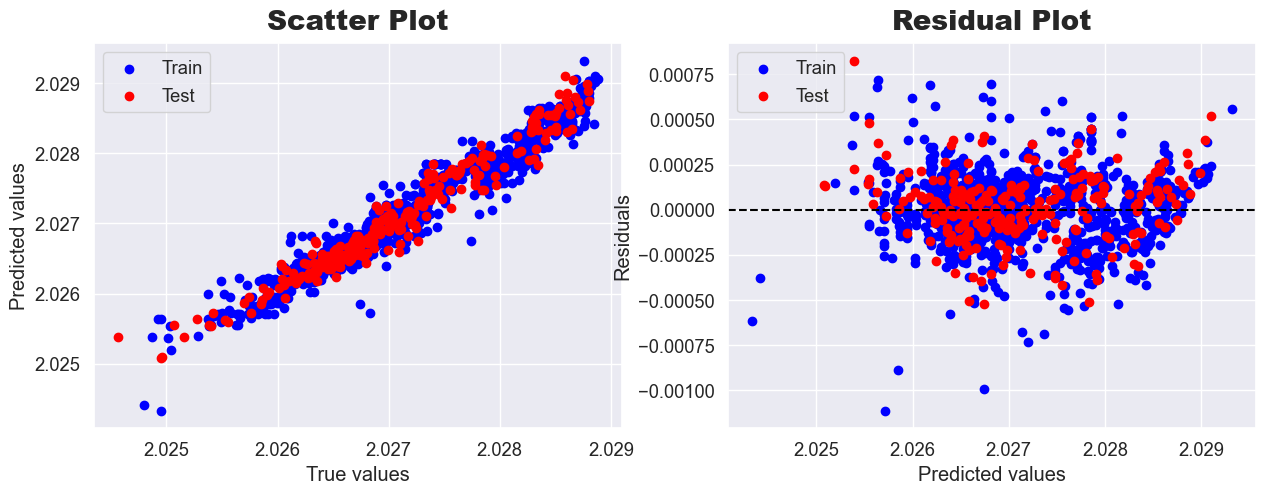

In [153]:
model_evaluation(RidgeCV())

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9533183578048356
Adjusted R-Squared 0.9515287679327535

Mean Absolute Error (MAE): 0.00014219406765580368
Mean Squared Error (MSE): 3.5071302455361935e-08
Root Mean Squared Error (RMSE): 0.00018727333621036907
Mean Percentage Error (MPE): -0.0006857571211681132
Mean Absolute Percentage Error (MAPE): 0.007014568558896986
-------------------------------------------------------------------------------------------------------------------------------


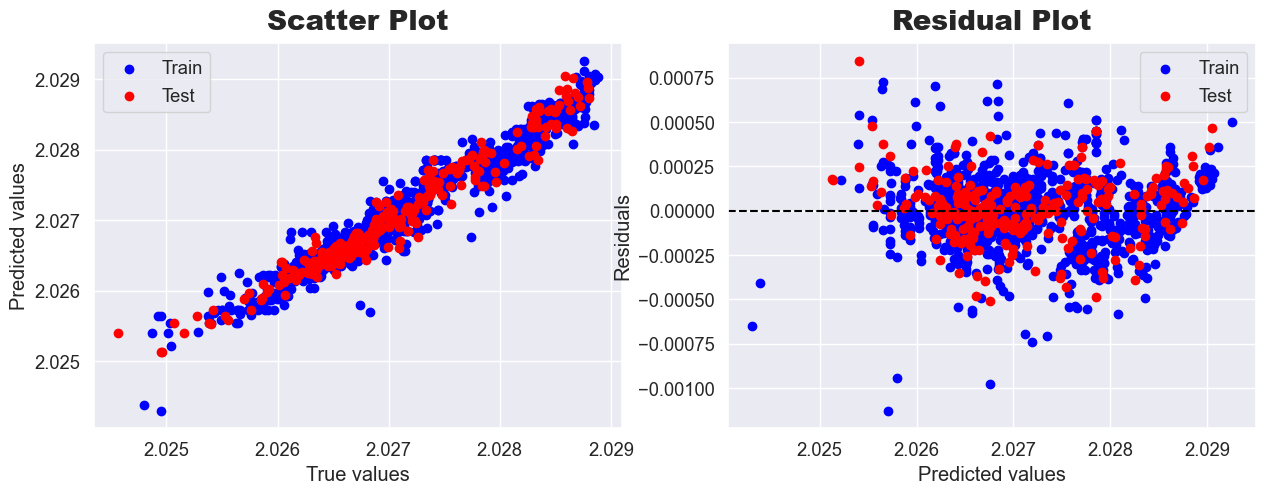

In [154]:
model_evaluation(LassoCV())

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9533181272491906
Adjusted R-Squared 0.9515285285385152

Mean Absolute Error (MAE): 0.00014219444237960251
Mean Squared Error (MSE): 3.5071475668779005e-08
Root Mean Squared Error (RMSE): 0.00018727379867130106
Mean Percentage Error (MPE): -0.0006857599458212766
Mean Absolute Percentage Error (MAPE): 0.007014587050920222
-------------------------------------------------------------------------------------------------------------------------------


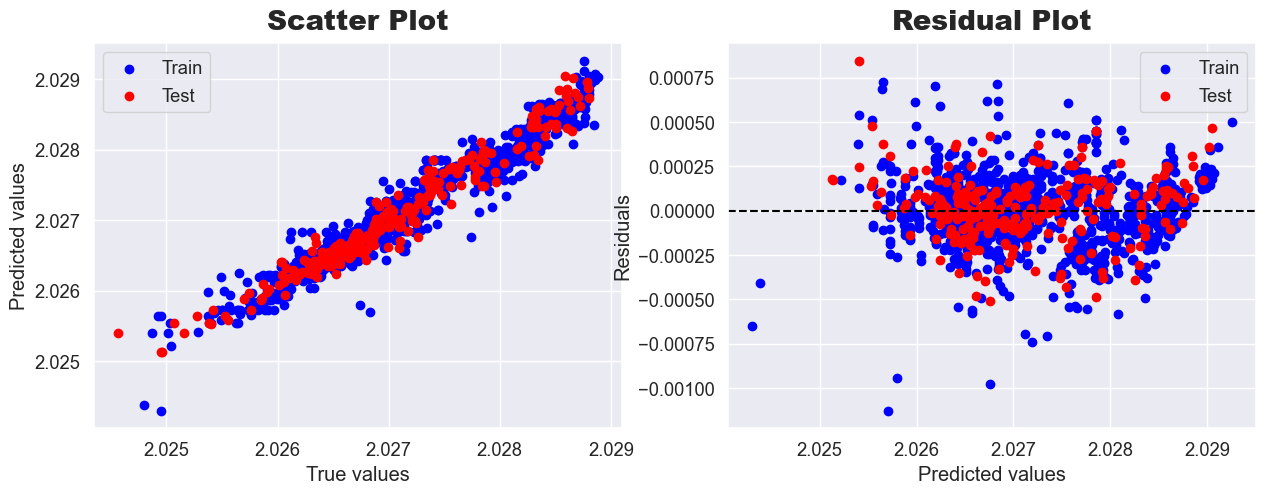

In [155]:
model_evaluation(ElasticNetCV())

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9628193583695414
Adjusted R-Squared 0.9613939993510817

Mean Absolute Error (MAE): 0.00010898830518309694
Mean Squared Error (MSE): 2.793332596686823e-08
Root Mean Squared Error (RMSE): 0.00016713265978517852
Mean Percentage Error (MPE): 0.0005390671181267209
Mean Absolute Percentage Error (MAPE): 0.0053769659107877725
-------------------------------------------------------------------------------------------------------------------------------


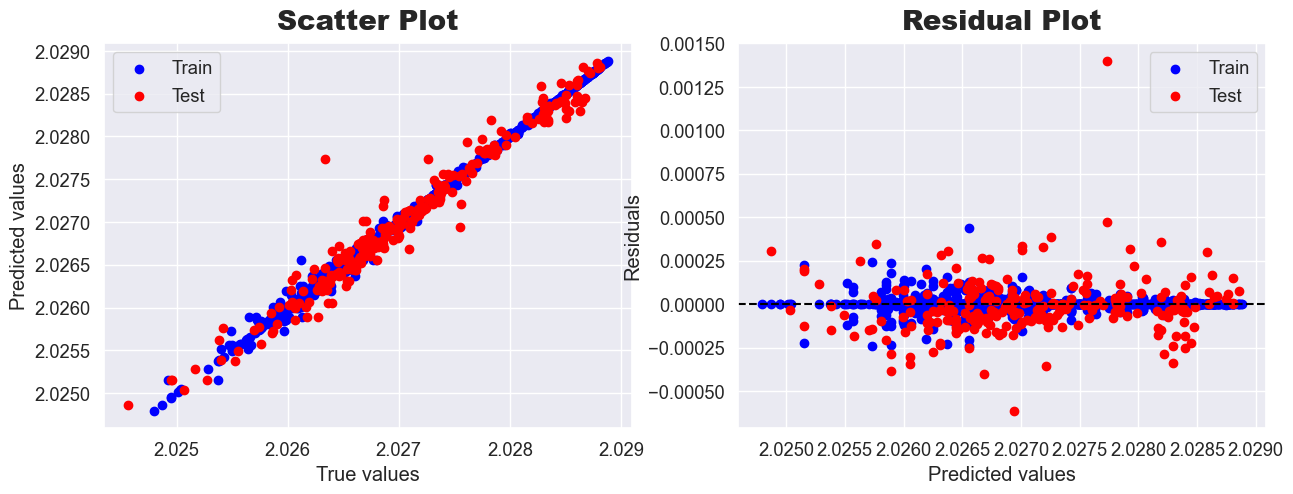

In [156]:
model_evaluation(DecisionTreeRegressor())

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9776605161460791
Adjusted R-Squared 0.976804108526883

Mean Absolute Error (MAE): 9.135072852541848e-05
Mean Squared Error (MSE): 1.6783359755469176e-08
Root Mean Squared Error (RMSE): 0.00012955060692821619
Mean Percentage Error (MPE): 0.0001357727361244992
Mean Absolute Percentage Error (MAPE): 0.004507044808383286
-------------------------------------------------------------------------------------------------------------------------------


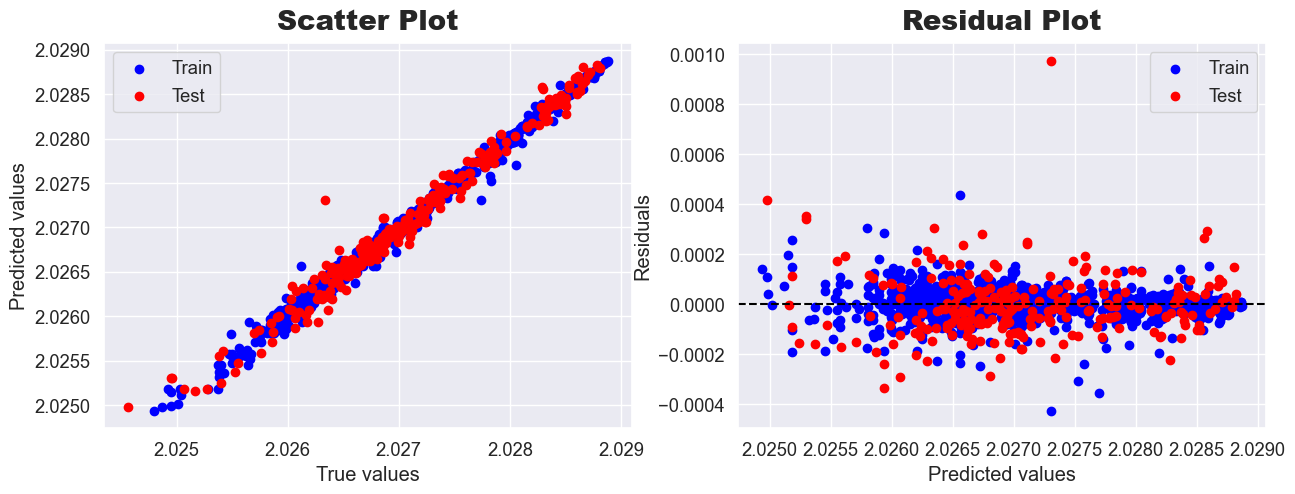

In [157]:
model_evaluation(RandomForestRegressor())

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9765343111983013
Adjusted R-Squared 0.9756347293274368

Mean Absolute Error (MAE): 9.908135524841499e-05
Mean Squared Error (MSE): 1.7629462687861994e-08
Root Mean Squared Error (RMSE): 0.00013277598686457575
Mean Percentage Error (MPE): 6.032374084633068e-05
Mean Absolute Percentage Error (MAPE): 0.0048881538841217854
-------------------------------------------------------------------------------------------------------------------------------


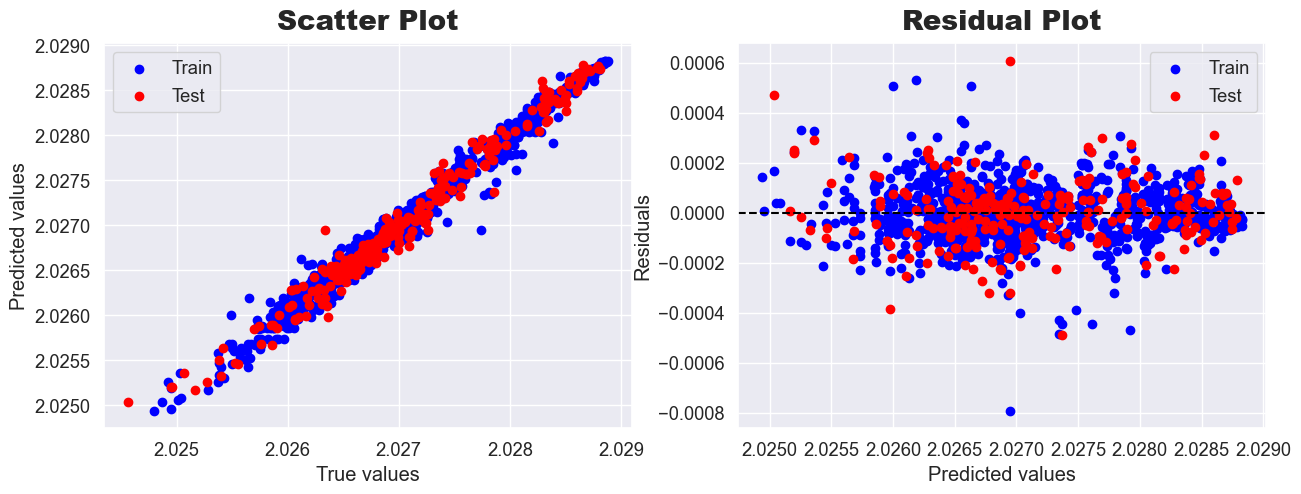

In [158]:
model_evaluation(GradientBoostingRegressor())

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9500684874512002
Adjusted R-Squared 0.9481543103795904

Mean Absolute Error (MAE): 0.00014961763792843222
Mean Squared Error (MSE): 3.751288721445312e-08
Root Mean Squared Error (RMSE): 0.00019368243909671605
Mean Percentage Error (MPE): 0.00024240195291884962
Mean Absolute Percentage Error (MAPE): 0.007381134423476677
-------------------------------------------------------------------------------------------------------------------------------


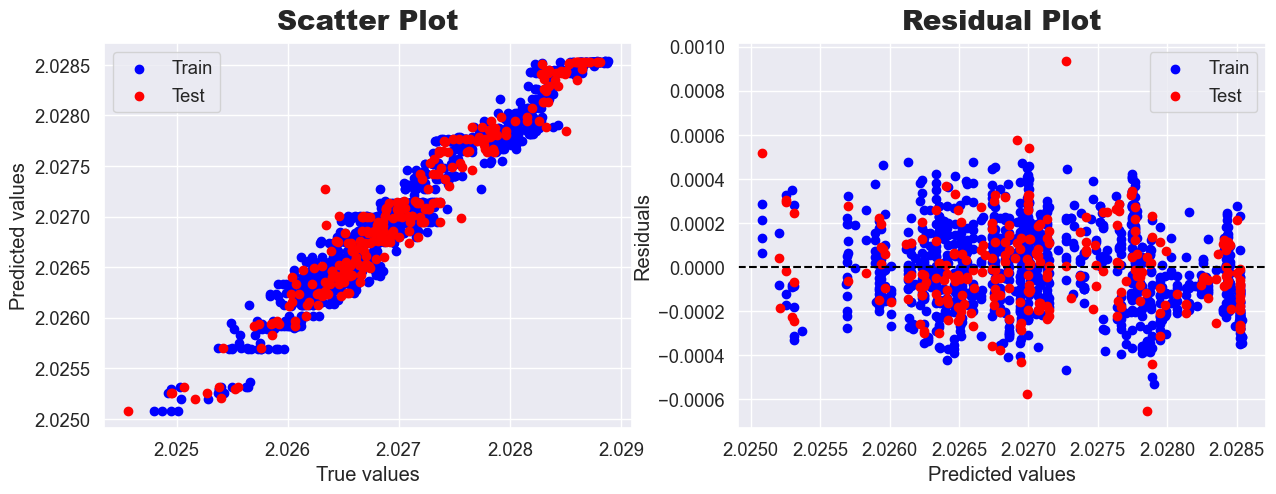

In [159]:
model_evaluation(AdaBoostRegressor())

-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9642786943140389
Adjusted R-Squared 0.9629092804745282

Mean Absolute Error (MAE): 0.00011935876300280398
Mean Squared Error (MSE): 2.6836946107747577e-08
Root Mean Squared Error (RMSE): 0.00016381985870994877
Mean Percentage Error (MPE): -0.00020341429793341697
Mean Absolute Percentage Error (MAPE): 0.0058885839087781605
-------------------------------------------------------------------------------------------------------------------------------


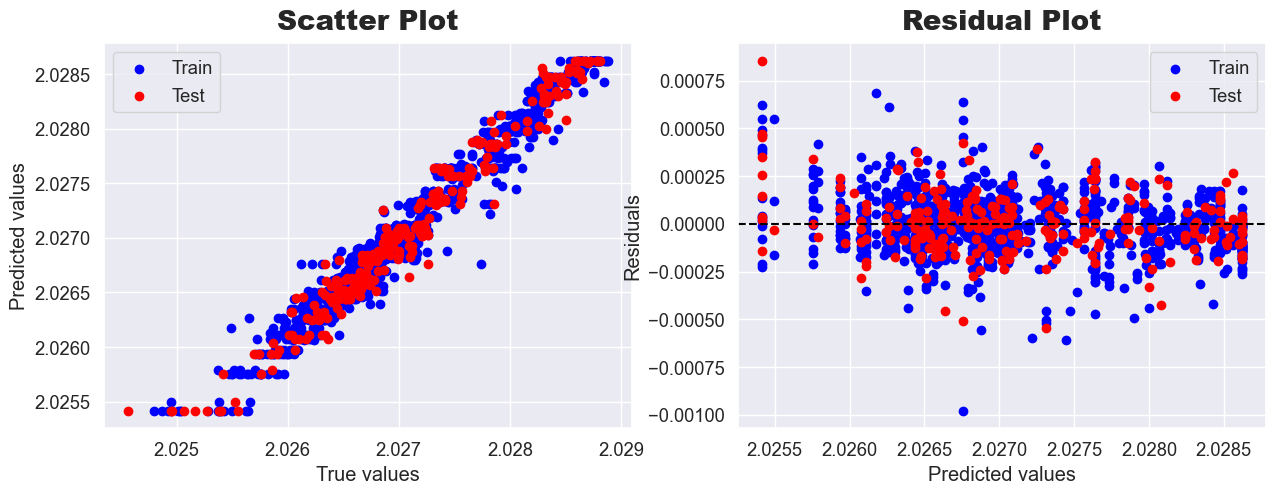

In [160]:
model_evaluation(XGBRegressor())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1193
[LightGBM] [Info] Number of data points in the train set: 1019, number of used features: 36
[LightGBM] [Info] Start training from score 2.027121
-------------------------------------------------------------------------------------------------------------------------------
R-squared: 0.9788276664194584
Adjusted R-Squared 0.9780160027340706

Mean Absolute Error (MAE): 8.98817112047889e-05
Mean Squared Error (MSE): 1.5906495139665545e-08
Root Mean Squared Error (RMSE): 0.0001261209544035627
Mean Percentage Error (MPE): 0.0001694079265138611
Mean Absolute Percentage Error (MAPE): 0.004434650685109126
-------------------------------------------------------------------------------------------------------------------------------


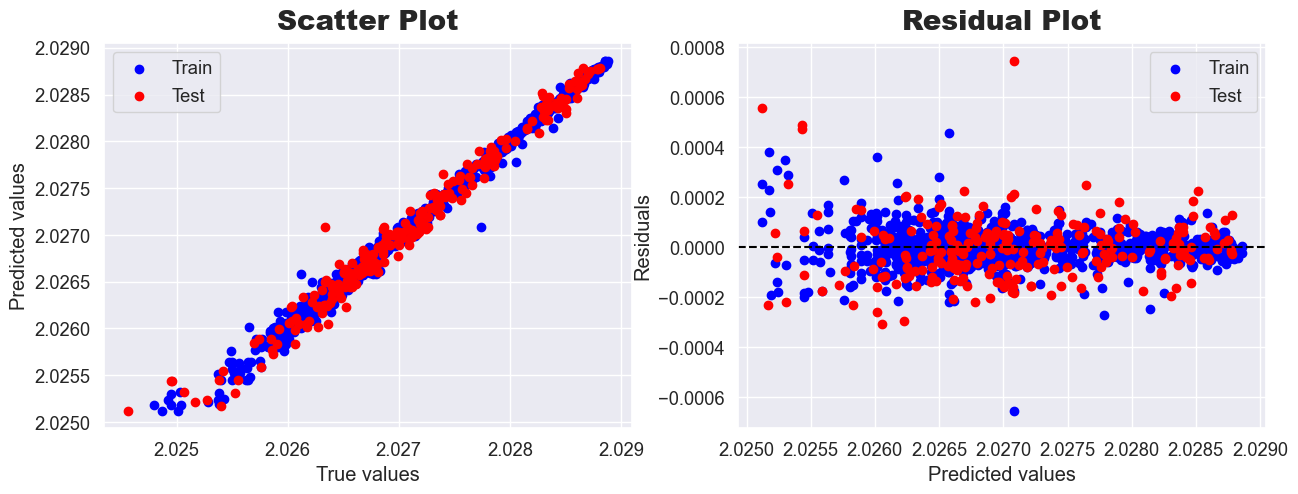

In [161]:
model_evaluation(LGBMRegressor())

In [162]:
algos = ["Linear Regression","RidgeCV Regression","LassoCV Regression","ElasticNet Regression","DecisionTree Regressor",
         "RandomForest Regressor","GradientBoosting Regressor","AdaBoost Regressor","XGBoost Regressor","LGBM Regressor"]

In [163]:
performance = pd.DataFrame({"Model":algos,"R2_Score":r2score,"Adjusted_R2":adj_r2_score,"MAE":mae_score,
                           "MSE":mse_score,"RMSE":rmse_score,"MPE":mpe_score,"MAPE":mape_score})
performance

Model  R2_Score  Adjusted_R2       MAE           MSE  \
0           Linear Regression  0.951871     0.950026  0.000144  3.615873e-08   
1          RidgeCV Regression  0.952156     0.950322  0.000144  3.594448e-08   
2          LassoCV Regression  0.953318     0.951529  0.000142  3.507130e-08   
3       ElasticNet Regression  0.953318     0.951529  0.000142  3.507148e-08   
4      DecisionTree Regressor  0.962819     0.961394  0.000109  2.793333e-08   
5      RandomForest Regressor  0.977661     0.976804  0.000091  1.678336e-08   
6  GradientBoosting Regressor  0.976534     0.975635  0.000099  1.762946e-08   
7          AdaBoost Regressor  0.950068     0.948154  0.000150  3.751289e-08   
8           XGBoost Regressor  0.964279     0.962909  0.000119  2.683695e-08   
9              LGBM Regressor  0.978828     0.978016  0.000090  1.590650e-08   

       RMSE       MPE      MAPE  
0  0.000190 -0.000739  0.007108  
1  0.000190 -0.000719  0.007103  
2  0.000187 -0.000686  0.007015  
3  0.000187 -0.000686  0.007015  
4  0.000167  0.000539  0.005377  
5  0.000130  0.000136  0.004507  
6  0.000133  0.000060  0.004888  
7  0.000194  0.000242  0.007381  
8  0.000164 -0.000203  0.005889  
9  0.000126  0.000169  0.004435